In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
#%matplotlib widget, remove below if used
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift

In [2]:
# load the data for the shift analysis
attr_sc_z_images = []
for i in np.arange(0,100,5):
    attr_sc_z_images.append(load_npy_files("/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z%d/frame_0_*.npy" %i))
attr_sc_z_images = np.swapaxes(attr_sc_z_images,0,1) 
attr_ni_z_images = load_img_files("/data/new_trap/ImageAnalysis/20200905/z/z*")

/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z0/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z0/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z0/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z5/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z5/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z5/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z10/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z10/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z10/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z15/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z15/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z15/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z20/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Z/z20/

In [3]:
# load the calibration data for tests 
attr_ni_cal_z_images = load_img_files("/data/new_trap/ImageAnalysis/20200905/displacement_z/*")

/data/new_trap/ImageAnalysis/20200905/displacement_z/0.bmp 0
/data/new_trap/ImageAnalysis/20200905/displacement_z/1nm.bmp 1
/data/new_trap/ImageAnalysis/20200905/displacement_z/7nm.bmp 2
/data/new_trap/ImageAnalysis/20200905/displacement_z/10nm.bmp 3
/data/new_trap/ImageAnalysis/20200905/displacement_z/27nm.bmp 4
/data/new_trap/ImageAnalysis/20200905/displacement_z/10nm_2.bmp 5
/data/new_trap/ImageAnalysis/20200905/displacement_z/550nm.bmp 6


In [4]:
def two_d_shift_analysis(zeroth_image,images,y_low=1024,y_up=0,x_low=0,x_up=1280,upsample_factor=100,print_results=False):
    displace1 = []
    displace2 = []
    for offset_image in images:
        #print(np.shape(offset_image),np.shape(zeroth_image))
        image=zeroth_image
        shift, error, diffphase = phase_cross_correlation(image, offset_image[y_up:y_low,x_low:x_up],
                                                          upsample_factor=upsample_factor)

        if(print_results==True):print(shift)
    
        displace1.append(shift[0])
        displace2.append(shift[1])
    return displace1,displace2

In [393]:
y_low=680
y_up=0
attr_z_ni_displacement = two_d_shift_analysis(attr_ni_z_images[0][y_up:y_low,0:1280],images=attr_ni_z_images,y_low=y_low,y_up=y_up,x_low=0,x_up=1280,upsample_factor=1000,print_results=True)

[0. 0.]
[ 9.39  -0.226]
[19.245 -0.107]
[2.9056e+01 1.2000e-02]
[ 3.8865e+01 -2.0000e-02]
[4.8624e+01 1.6000e-02]
[ 5.8398e+01 -7.0000e-03]
[68.175 -0.142]
[77.919  0.086]
[87.72  -0.106]
[ 9.7483e+01 -1.6000e-02]
[ 1.07215e+02 -5.40000e-02]
[ 1.16984e+02 -7.10000e-02]
[1.26829e+02 4.40000e-02]
[1.36523e+02 5.40000e-02]
[ 1.46314e+02 -8.50000e-02]
[1.56063e+02 3.00000e-02]
[1.65818e+02 3.60000e-02]
[ 1.75518e+02 -2.70000e-02]
[1.85311e+02 5.20000e-02]
[1.94973e+02 1.08000e-01]


------------------------------------------------------------------
| FCN = 0.1102                  |      Ncalls=36 (36 total)      |
| EDM = 1.07E-17 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.5120864370001091


/home/analysis_user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':
/home/analysis_user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':
/home/analysis_user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':
/home/analysis_user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  if sys.path[0] == '':


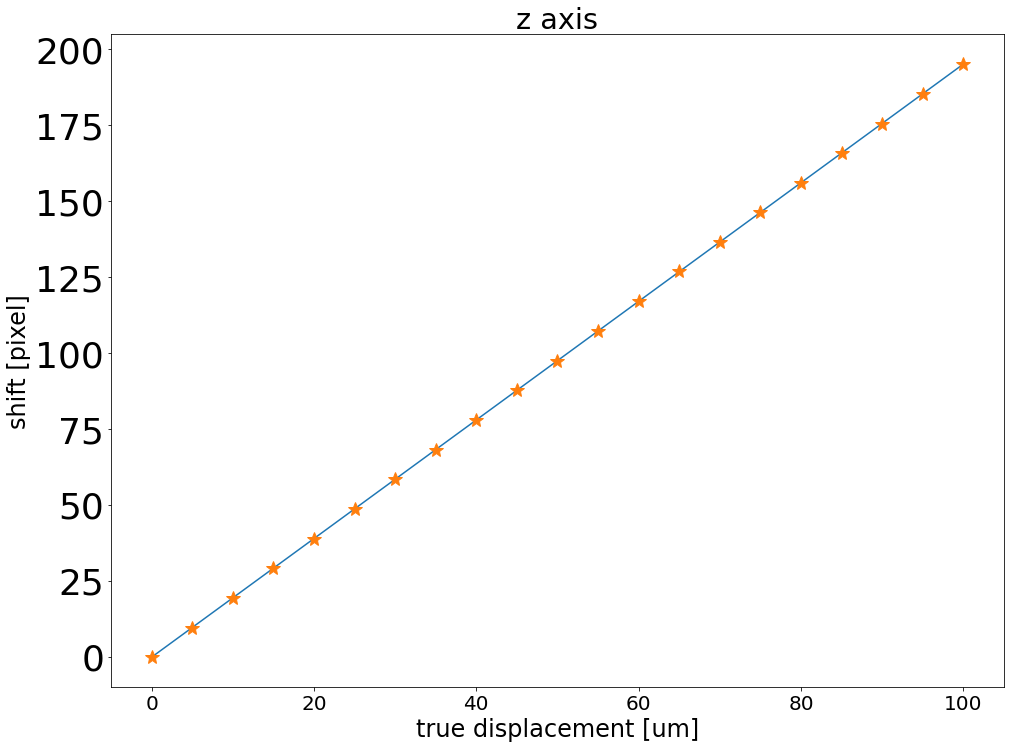

In [394]:
data_y=attr_z_ni_displacement[0]
data_x=np.arange(0,100,5)#np.arange(0,len(data_y),1)
data_y_error=1

def chisquare_linear(a,b):
    return chisquare_1d(function=linear,functionparams=[a,b],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]

m2=Minuit(chisquare_linear, 
     a = 100,
     b=0,
     errordef = 1,
     print_level=1)

m2.migrad()


cal_factor_z_side1_pixel_size = 1/m2.values["a"]
print(cal_factor_z_side1_pixel_size)
plt.title("z axis")
plt.plot(data_x,m2.values["a"]*data_x+m2.values["b"])
plt.xlabel("true displacement [um]")
plt.ylabel("shift [pixel]")
plt.plot(data_x,attr_z_ni_displacement[0],linestyle="",marker="*",markersize=15)
plt.show()



Text(0.5, 0, 'true displacement in z [um]')

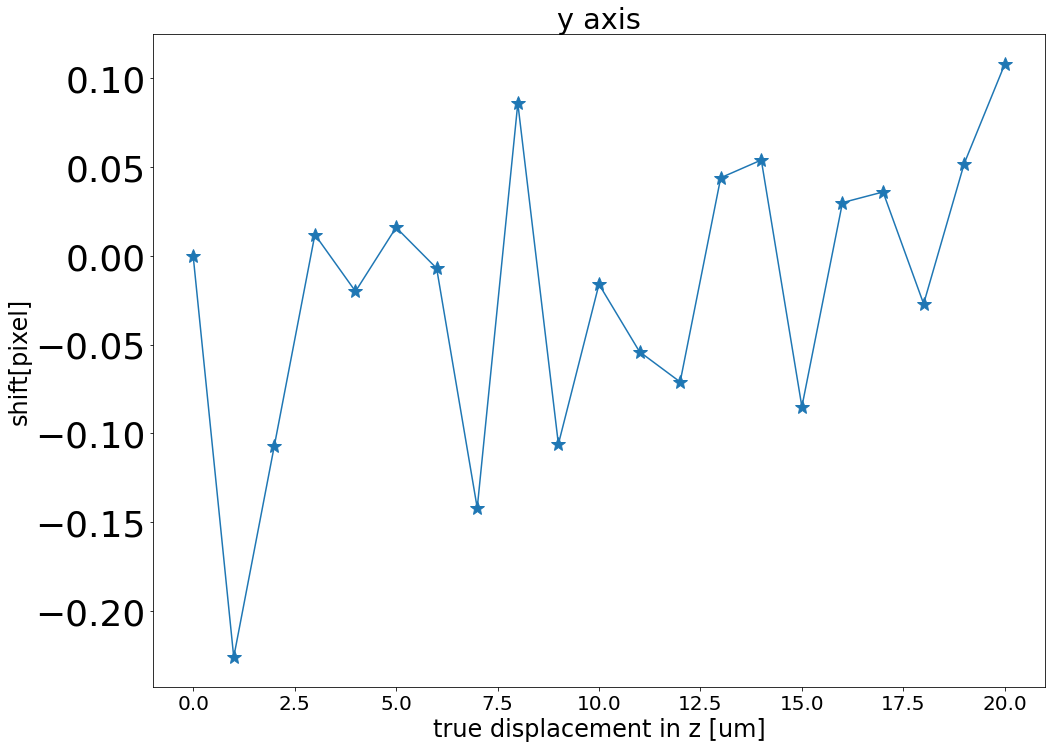

In [395]:
plt.plot(attr_z_ni_displacement[1],marker="*",markersize=15)
plt.ylabel("shift[pixel]")
plt.title("y axis")
plt.xlabel("true displacement in z [um]")

In [8]:
y_low=650
y_up=500
x_low=10
x_up=1000

attr_z_ni_calibration = two_d_shift_analysis(attr_ni_cal_z_images[0][y_up:y_low,x_low:x_up],images=attr_ni_cal_z_images,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=10000,print_results=True)


[0. 0.]
[0.0001 0.0111]
[ 0.0147 -0.006 ]
[-0.0021 -0.0183]
[ 0.0295 -0.0097]
[ 0.0109 -0.022 ]
[ 0.4614 -0.0109]


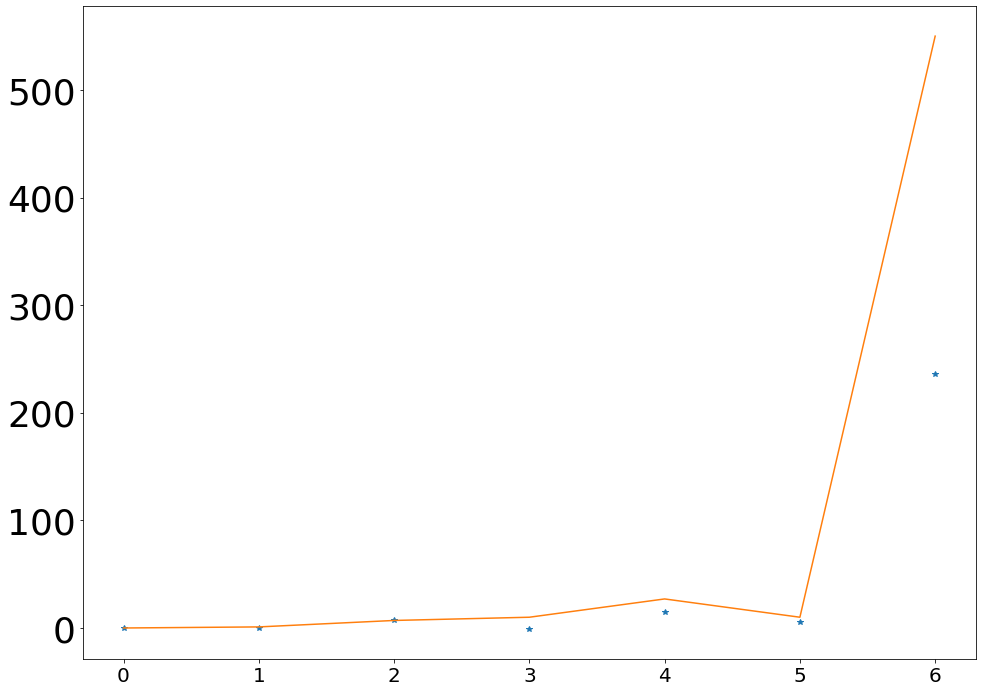

In [9]:
meas_z_cal = np.arange(0,len(attr_z_ni_calibration[0]),1)
true_vals_z_cal = [0,1,7,10,27,10,550]
plt.plot(meas_z_cal,np.multiply(attr_z_ni_calibration[0],cal_factor_z_side1_pixel_size*1000),linestyle="",marker="*")
plt.plot(meas_z_cal,true_vals_z_cal)
#plt.yscale("log")

[0. 0.]
[ 5.07 -0.11]
[12.35 -0.15]
[19.46 -0.13]
[26.51 -0.07]
[33.56 -0.1 ]
[40.59 -0.26]
[ 4.769e+01 -1.000e-02]
[54.61 -0.17]
[61.65 -0.12]
[68.66 -0.1 ]
[-74.35  -0.09]
[-67.21  -0.08]
[-60.19  -0.12]
[-53.13  -0.21]
[-46.4   -0.27]
[-39.12  -0.04]
[-32.29  -0.12]
[-25.1   -0.12]
[ 0.21 -0.04]


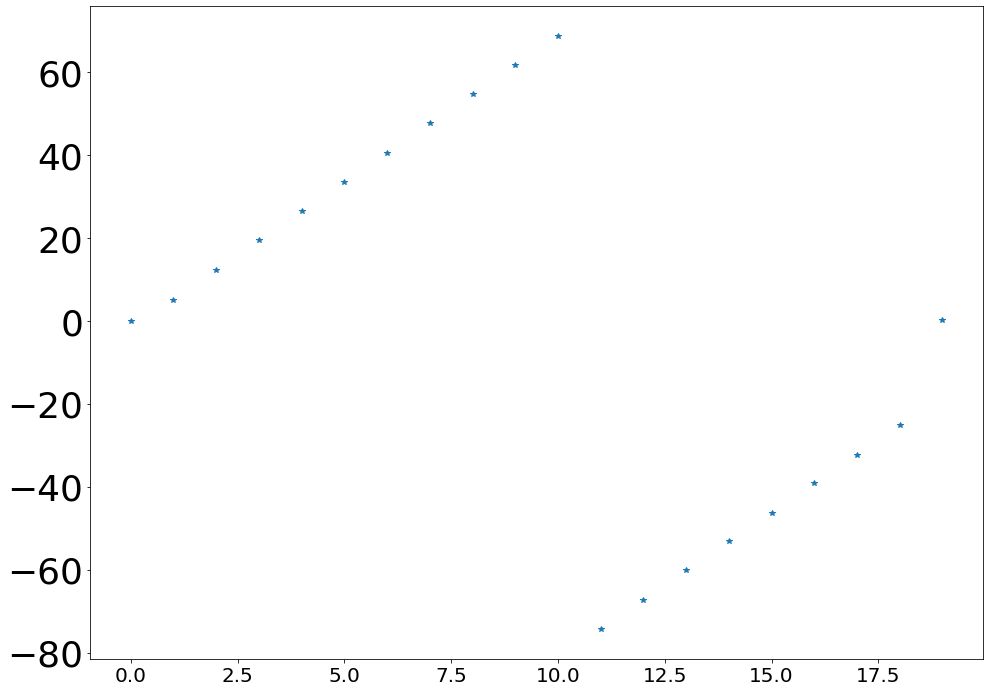

In [396]:
y_up = 250
y_low = 400
x_up=640
x_low=0
attr_z_side2_img = attr_sc_z_images[2]
attr_z_side2_displacement = two_d_shift_analysis(attr_z_side2_img[0][y_up:y_low][x_low:x_up],images=attr_z_side2_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(attr_z_side2_displacement[0],marker="*",linestyle="")
#plt.plot(np.arange(0,100,5))

[0. 0.]
[0.01  0.009]
[-0.002  0.008]
[-0.001  0.027]
[0.033 0.031]
[0.029 0.03 ]
[0.031 0.051]
[0.045 0.053]
[0.04  0.057]
[0.062 0.068]
[0.051 0.064]
[0.059 0.066]
[0.075 0.08 ]
[0.077 0.073]
[0.085 0.078]
[0.111 0.085]
[0.109 0.103]
[0.117 0.083]
[0.123 0.099]
[0.117 0.11 ]


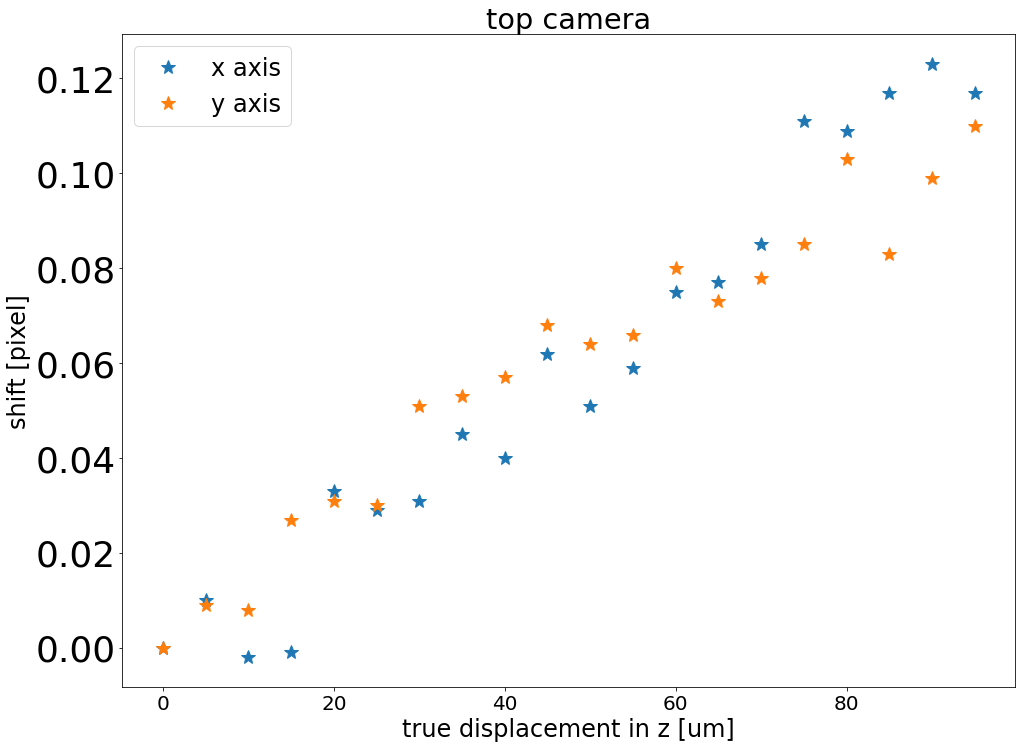

In [411]:
xaxis = np.arange(0,100,5)
y_up = 0
y_low = 300
x_up=500
x_low=0
attr_z_top_img = attr_sc_z_images[1]
attr_z_top_displacement = two_d_shift_analysis(attr_z_top_img[0][y_up:y_low,x_low:x_up],images=attr_z_top_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=1000,print_results=True)

plt.plot(xaxis,attr_z_top_displacement[0],marker="*",linestyle="",label="x axis",markersize=15)
plt.plot(xaxis,attr_z_top_displacement[1],marker="*",linestyle="",label="y axis",markersize=15)
plt.ylabel("shift [pixel]")
plt.title("top camera")
plt.xlabel("true displacement in z [um]")
plt.legend()
plt.show()

[0. 0.]
[-0.004 -0.03 ]
[ 0.001 -0.047]
[ 0.004 -0.081]
[-0.016 -0.118]
[-0.013 -0.129]
[-0.012 -0.137]
[ 0.015 -0.176]
[ 0.006 -0.205]
[ 0.02  -0.218]
[ 0.025 -0.242]
[ 0.02  -0.274]
[ 0.024 -0.283]
[ 0.029 -0.299]
[ 0.029 -0.321]
[ 0.055 -0.323]
[ 0.052 -0.353]
[ 0.068 -0.334]
[ 0.05  -0.342]
[ 0.063 -0.394]


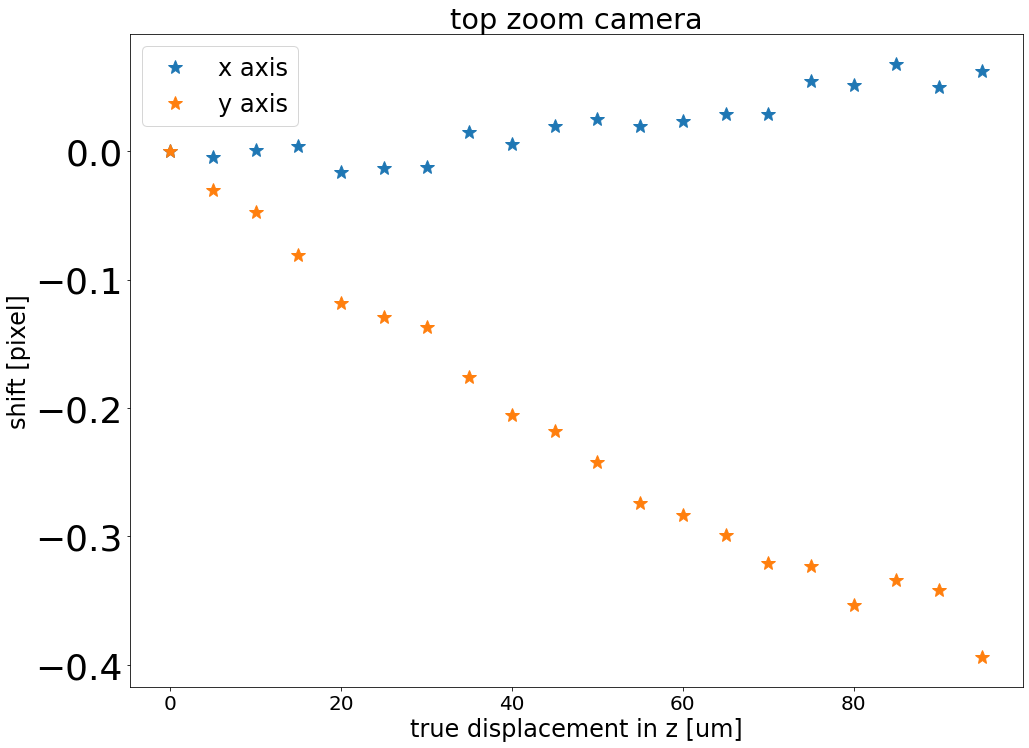

In [410]:
y_up = 150
y_low = 300
x_up=500
x_low=150
attr_z_top_zoom_img = attr_sc_z_images[0]
attr_z_top_zoom_displacement = two_d_shift_analysis(attr_z_top_zoom_img[0][y_up:y_low,x_low:x_up],images=attr_z_top_zoom_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=1000,print_results=True)

plt.plot(xaxis,attr_z_top_zoom_displacement[0],marker="*",linestyle="",label="x axis",markersize=15)
plt.plot(xaxis,attr_z_top_zoom_displacement[1],marker="*",linestyle="",label="y axis",markersize=15)
plt.title("top zoom camera")
plt.legend()
plt.ylabel("shift [pixel]")
plt.xlabel("true displacement in z [um]")
plt.show()

In [13]:
# load the data for the shift analysis
attr_sc_y_images = []
true_y_displacements = [0,25,50,75,100,125,150,175,184,186,190,200,225,275,300,350,367,400,450,475,500]
 
for i in true_y_displacements:
    attr_sc_y_images.append(load_npy_files("/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y%d/frame_0_*.npy" %i))
print(np.shape(attr_sc_y_images))    
attr_sc_y_images = np.swapaxes(attr_sc_y_images,0,1)     
attr_ni_y_images= load_img_files("/data/new_trap/ImageAnalysis/20200905/y/y*")

/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y0/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y0/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y0/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y25/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y25/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y25/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y50/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y50/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y50/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y75/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y75/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y75/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/y100/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/Y/

In [14]:
# load the calibration data for tests 
attr_ni_cal_y_images = load_img_files("/data/new_trap/ImageAnalysis/20200905/displacement_y/*")

/data/new_trap/ImageAnalysis/20200905/displacement_y/0.bmp 0
/data/new_trap/ImageAnalysis/20200905/displacement_y/p4_nm.bmp 1
/data/new_trap/ImageAnalysis/20200905/displacement_y/p8_nm.bmp 2
/data/new_trap/ImageAnalysis/20200905/displacement_y/p10_nm.bmp 3
/data/new_trap/ImageAnalysis/20200905/displacement_y/p15_nm.bmp 4
/data/new_trap/ImageAnalysis/20200905/displacement_y/p26_nm.bmp 5
/data/new_trap/ImageAnalysis/20200905/displacement_y/m41_nm.bmp 6
/data/new_trap/ImageAnalysis/20200905/displacement_y/p60_nm.bmp 7


[0. 0.]
[ 0.758 34.606]
[ 2.321 48.244]
[ 3.844 62.084]
[ 5.174 82.751]
[ 6.6   93.126]
[ 7.964 95.591]
[ 9.299 90.318]
[ 9.889 93.245]
[ 9.946 95.744]
[10.198 93.448]
[ 10.789 111.467]
[ 12.204 120.652]
[ 15.035 152.652]
[ 16.453 173.19 ]
[ 19.109 196.505]
[ 19.982 208.122]
[ 21.771 240.085]
[  0.105 100.93 ]
[5.8000e-02 6.6224e+01]
[-0.004 -0.01 ]


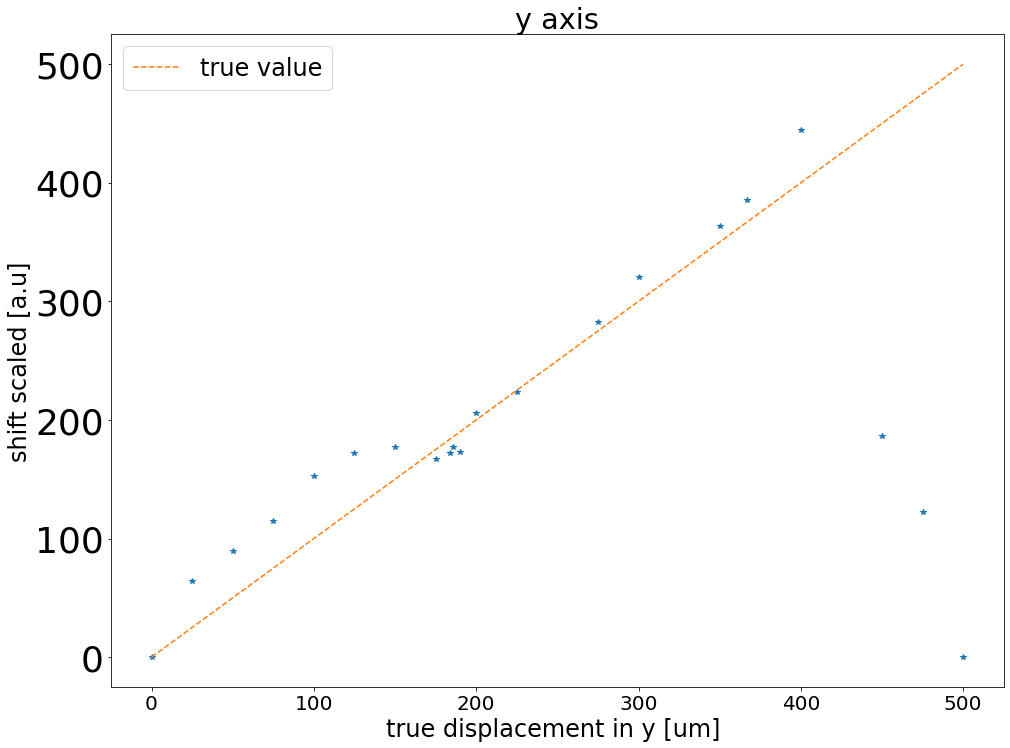

In [429]:
y_low=700
y_up=500
attr_y_ni_displacement = two_d_shift_analysis(attr_ni_y_images[0][y_up:y_low][0:1280],images=attr_ni_y_images,y_low=y_low,y_up=y_up,x_low=0,x_up=1280,upsample_factor=1000,print_results=True)

plt.plot(true_y_displacements,np.multiply(attr_y_ni_displacement[1],1.85),linestyle="",marker="*")
plt.plot(true_y_displacements,true_y_displacements,linestyle="--",label="true value")
plt.ylabel("shift scaled [a.u]")
plt.title("y axis")
plt.xlabel("true displacement in y [um] ")
plt.legend()
plt.show()

In [480]:
data_x

[0,
 25,
 50,
 75,
 100,
 125,
 150,
 175,
 184,
 186,
 190,
 200,
 225,
 275,
 300,
 350,
 367,
 400,
 450,
 475,
 500]

No handles with labels found to put in legend.


------------------------------------------------------------------
| FCN = 6.318                   |       Ncalls=1 (1 total)       |
| EDM = 6.32 (Goal: 0.0002)     |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------


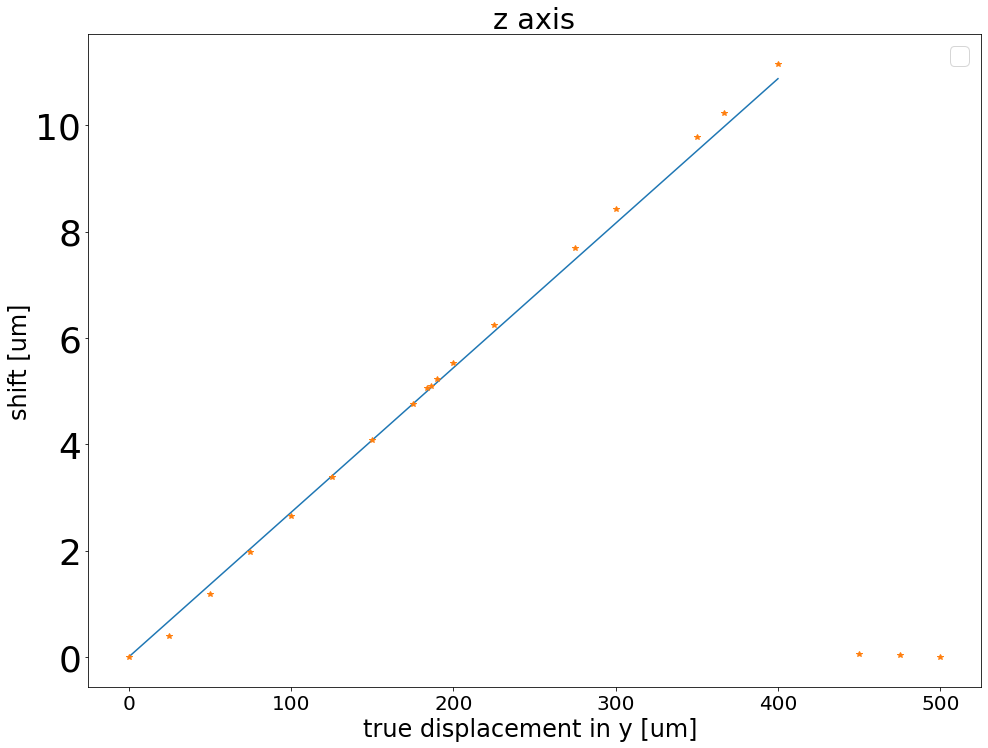

In [510]:

data_y=attr_y_ni_displacement[0][:-3]
data_x=np.array(true_y_displacements[:-3])
data_y_error=10

def chisquare_linear(a,b):
    return chisquare_1d(function=linear,functionparams=[a,b],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]

m2=Minuit(chisquare_linear, 
     a = 0.02718767230209198,
     fix_a="True",
     b=0,
     fix_b="True",
     errordef = 1,
     print_level=1)
m2.migrad()
plt.plot(data_x,m2.values["a"]*data_x+m2.values["b"])
plt.plot(true_y_displacements,np.multiply(attr_y_ni_displacement[0],cal_factor_z_side1_pixel_size),linestyle="",marker="*")
plt.ylabel("shift [um]")
plt.title("z axis")
plt.xlabel("true displacement in y [um] ")
plt.legend()
plt.show()

In [485]:
# load the calibration data for tests 
true_values_y_cal = [0,4,8,10,15,26,-41,60]

y_low=700
y_up=500
x_low=0
x_up=1280

attr_y_ni_calibration = two_d_shift_analysis(attr_ni_cal_y_images[0][y_up:y_low][x_low:x_up],images=attr_ni_cal_y_images,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=10000,print_results=True)


[0. 0.]
[-0.0034 -0.0056]


KeyboardInterrupt: 

[0. 0.]
[ 0.35 -0.02]
[1.94 0.04]
[2.61 0.02]
[3.62 0.01]
[4.59 0.05]
[5.59 0.11]
[ 6.62 -0.04]
[6.85 0.  ]
[ 6.97 -0.06]
[ 7.15 -0.1 ]
[7.66 0.11]
[8.64 0.17]
[1.05e+01 1.00e-02]
[11.44  0.15]
[13.12 -0.05]
[0.13 0.  ]
[0.09 0.  ]
[ 0.04 -0.04]
[ 0.03 -0.04]
[ 0.05 -0.01]


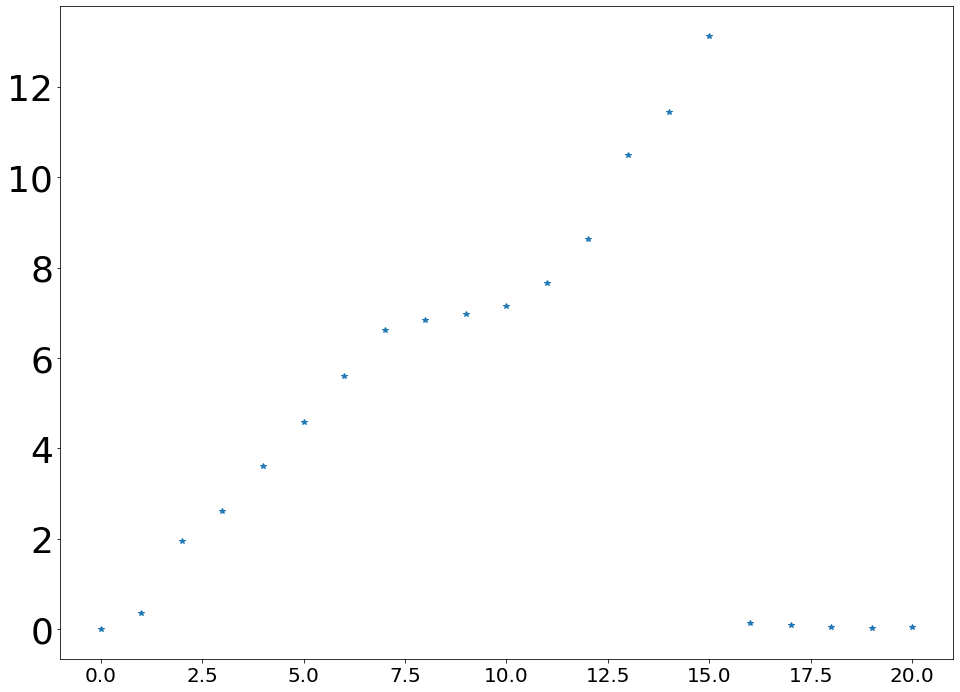

In [433]:
y_up = 300
y_low = 380
x_up=640
x_low=0
attr_y_side2_img = attr_sc_y_images[2]
attr_y_side2_displacement = two_d_shift_analysis(attr_y_side2_img[0][y_up:y_low][x_low:x_up],images=attr_y_side2_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(attr_y_side2_displacement[0],marker="*",linestyle="")
#plt.plot(np.arange(0,100,5))

[0. 0.]
[-0.11 -7.39]
[-0.15 -8.12]
[-0.28 -8.25]
[ -0.4  -15.82]
[-0.19 -8.43]
[ -0.34 -16.  ]
[ -0.3 -16.1]
[ -0.19 -11.46]
[ -0.16 -12.1 ]
[ -0.17 -12.98]
[ -0.21 -16.11]
[ -0.11 -16.36]
[  0.  -16.3]
[  0.1 -16.5]
[  0.07 -24.89]
[  0.07 -29.39]
[  0.07 -31.52]
[  0.16 -32.13]
[  0.16 -38.28]
[  0.18 -40.01]


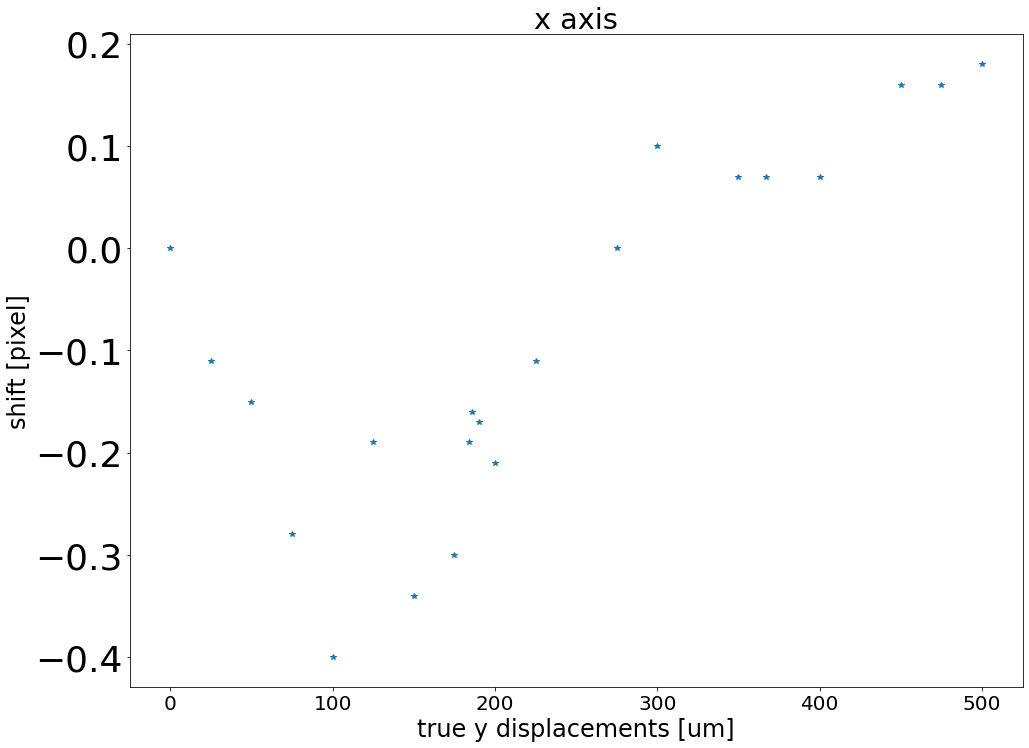

Text(0.5, 1.0, 'y axis')

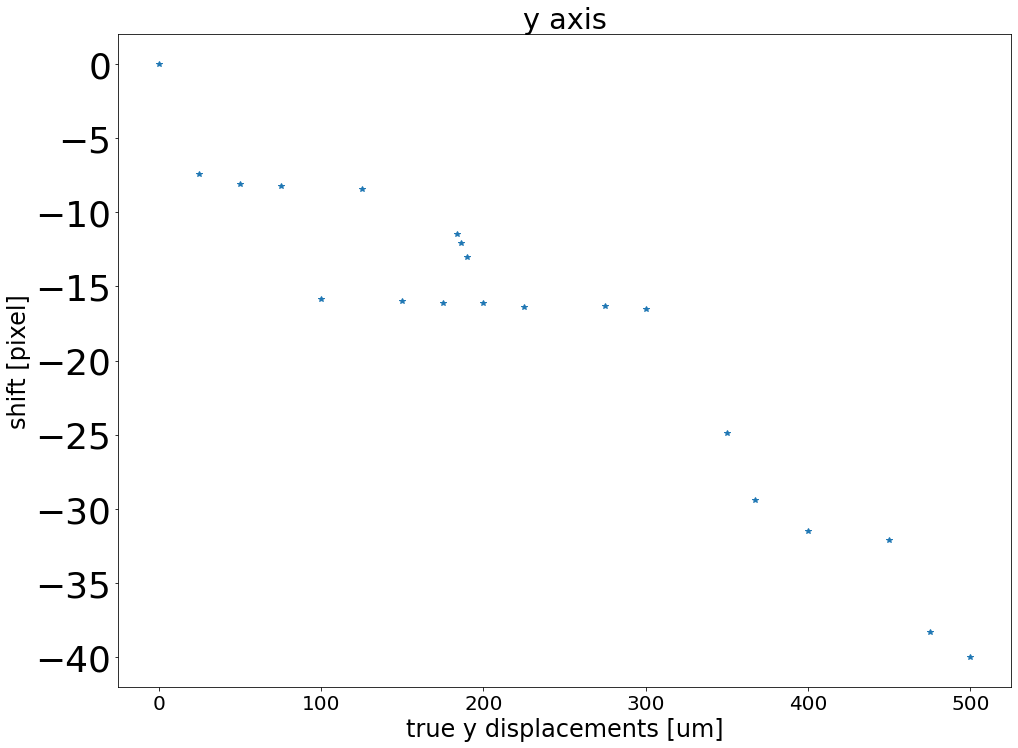

In [449]:
y_up = 0
y_low = 480
x_up=640
x_low=0
attr_y_top_img = attr_sc_y_images[1]
attr_y_top_displacement = two_d_shift_analysis(attr_y_top_img[0][y_up:y_low,x_low:x_up],images=attr_y_top_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)


plt.plot(true_y_displacements,attr_y_top_displacement[0],marker="*",linestyle="",label="x axis")
plt.ylabel("shift [pixel]")
plt.xlabel("true y displacements [um]")
plt.title("x axis")
plt.show()
plt.plot(true_y_displacements,attr_y_top_displacement[1],marker="*",linestyle="",label="y axis")
plt.ylabel("shift [pixel]")
plt.xlabel("true y displacements [um]")
plt.title("y axis")

[0. 0.]
[-0.03 12.5 ]
[-0.06 25.46]
[-0.07 38.27]
[-0.1 51.2]
[-0.1  64.22]
[-0.12 77.56]
[-0.13 90.62]
[-0.11 95.56]
[-0.13 96.36]
[-0.11 98.45]
[ -0.14 103.66]
[ -0.13 116.67]
[-1.4000e-01  1.4335e+02]
[-1.3000e-01  1.4984e+02]
[-1.4000e-01  1.7257e+02]
[-1.4000e-01  1.8061e+02]
[-1.6000e-01  1.9764e+02]
[-2.0000e-01  2.2366e+02]
[ -0.24 236.8 ]
[-2.4000e-01  2.4879e+02]


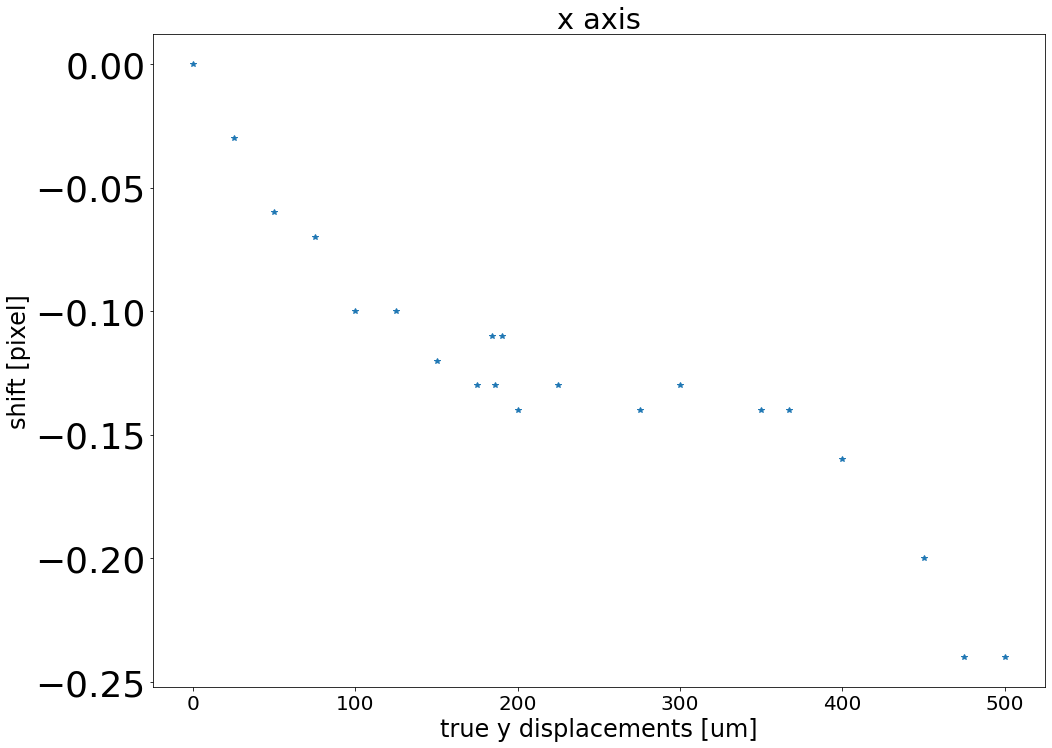

Text(0.5, 1.0, 'y axis')

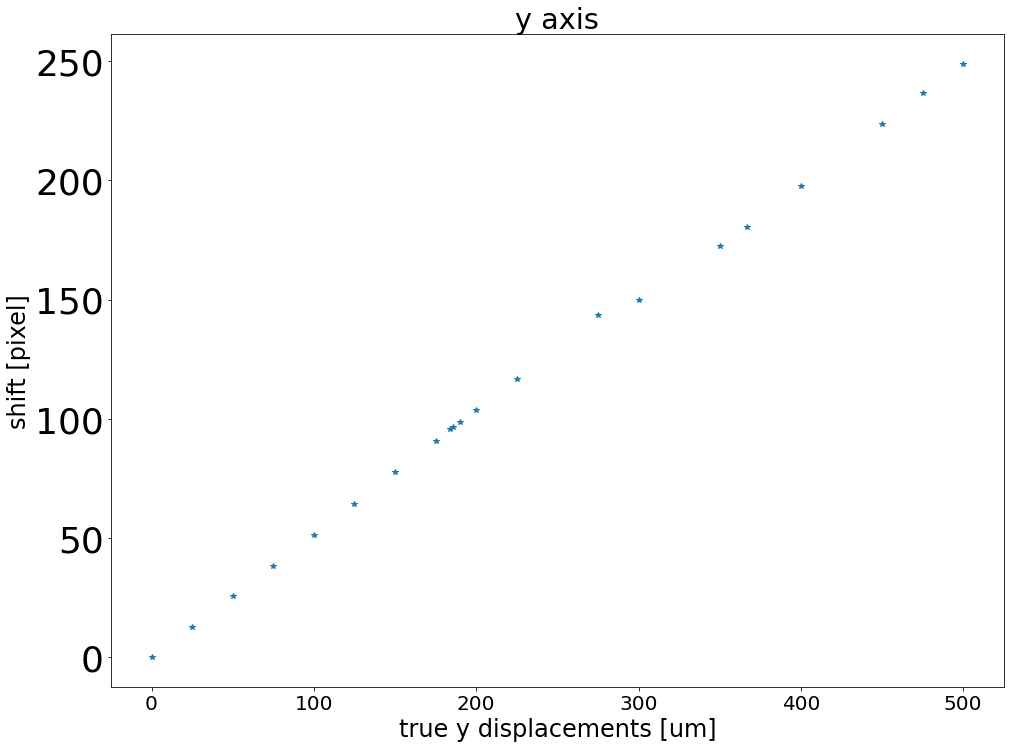

In [448]:
y_up = 0
y_low = 480
x_up=640
x_low=0
attr_y_top_zoom_img = attr_sc_y_images[0]
attr_y_top_zoom_displacement = two_d_shift_analysis(attr_y_top_zoom_img[0][y_up:y_low,x_low:x_up],images=attr_y_top_zoom_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(true_y_displacements,attr_y_top_zoom_displacement[0],marker="*",linestyle="",label="x axis")
plt.ylabel("shift [pixel]")
plt.xlabel("true y displacements [um]")
plt.title("x axis")
plt.show()
plt.plot(true_y_displacements,attr_y_top_zoom_displacement[1],marker="*",linestyle="",label="y axis")
plt.ylabel("shift [pixel]")
plt.xlabel("true y displacements [um]")
plt.title("y axis")

In [27]:
# load the data for the shift analysis
attr_sc_x_images = []
true_x_displacements = [0,75,150,200,325,327,329,330,332,333,400,475,"330_5","333_05"]
for i in true_x_displacements:
    #print("/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x%s/frame_0_*.npy" %str(i))
    t = load_npy_files("/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x%s/frame_0_*.npy" %str(i))
    #print(np.shape(t))
    attr_sc_x_images.append(t)
#print(np.shape(attr_sc_x_images))
attr_sc_x_images = np.swapaxes(attr_sc_x_images,0,1)     
attr_ni_x_images= load_img_files("/data/new_trap/ImageAnalysis/20200905/x/x*")



/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x0/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x0/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x0/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x75/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x75/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x75/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x150/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x150/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x150/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x200/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x200/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x200/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x325/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200

In [450]:
y_low=1024
y_up=0
attr_x_ni_displacement = two_d_shift_analysis(attr_ni_x_images[0][y_up:y_low][0:1280],images=attr_ni_x_images,y_low=y_low,y_up=y_up,x_low=0,x_up=1280,upsample_factor=1000,print_results=True)

[0. 0.]
[0.008 0.008]
[0.247 0.006]
[ 0.345 -0.003]
[2.246 0.045]
[ 2.331 -0.037]
[2.4   0.019]
[2.441 0.018]
[ 2.494 -0.004]
[2.506 0.034]
[ 2.291 -0.006]
[ 2.392e+00 -1.000e-03]
[2.446 0.011]
[2.504 0.09 ]


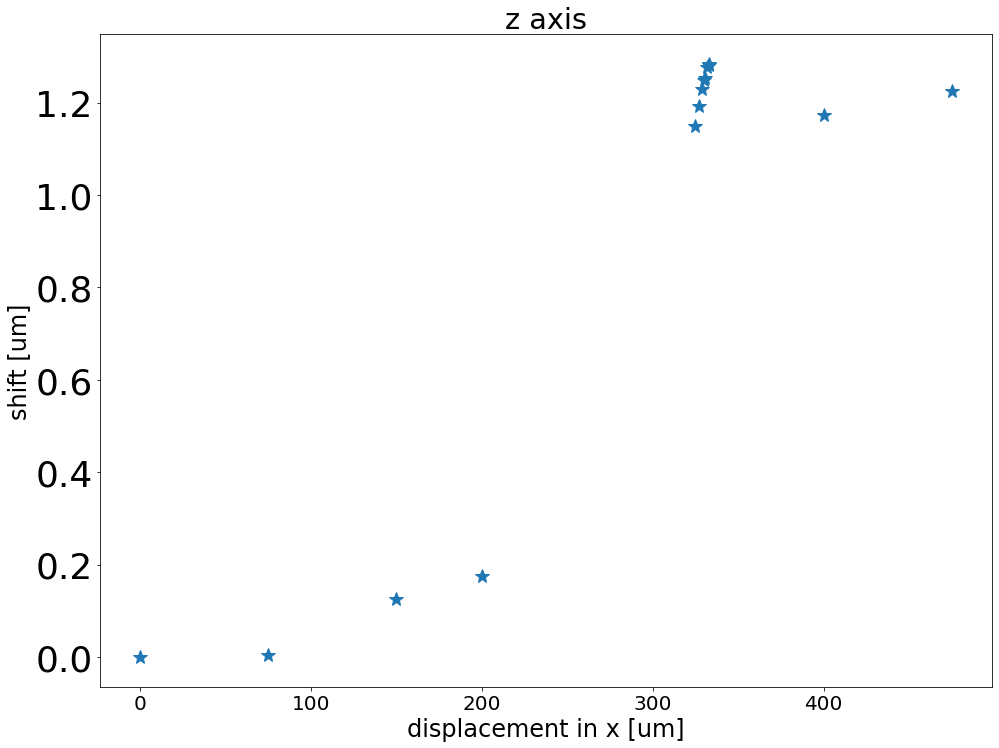

In [469]:
true_x_displacements = [0,75,150,200,325,327,329,330,332,333,400,475,330.5,333.05]
plt.plot(true_x_displacements,np.multiply(attr_x_ni_displacement[0],cal_factor_z_side1_pixel_size),linestyle="",marker="*",markersize=15)
#plt.plot(true_x_displacements,np.multiply(attr_x_ni_displacement[0],1),linestyle="",marker="*")
#plt.plot(true_x_displacements,true_x_displacements,linestyle="",marker="*")
plt.title("z axis")
plt.ylabel("shift [um]")
plt.xlabel("displacement in x [um]")
plt.show()

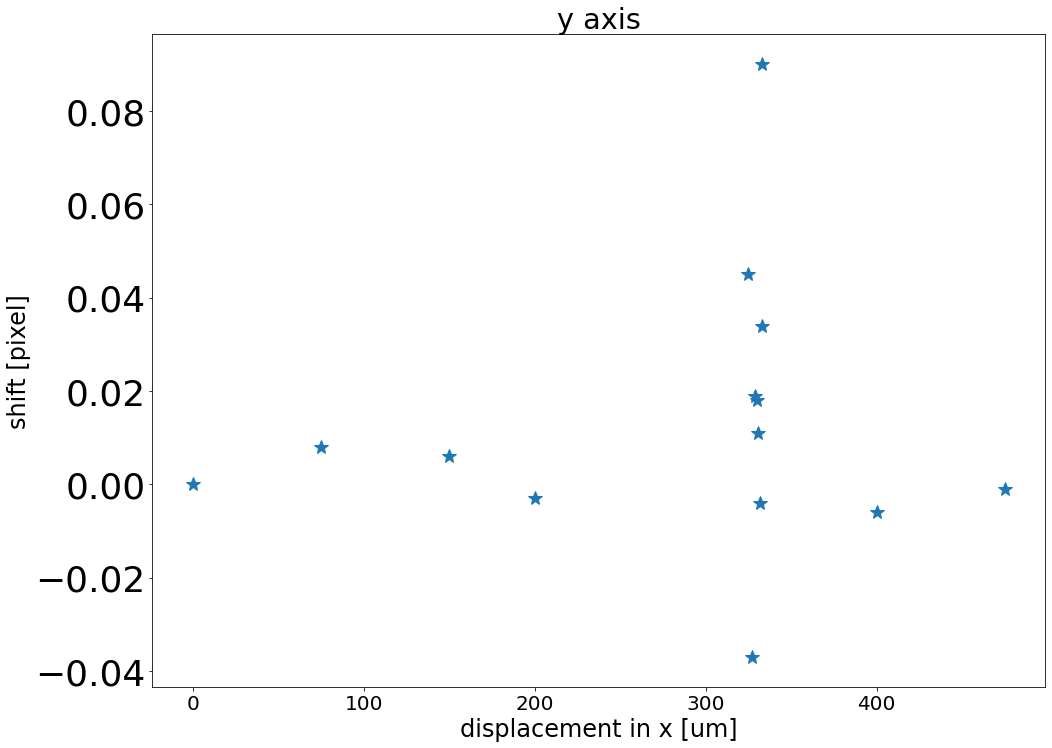

In [470]:
true_x_displacements = [0,75,150,200,325,327,329,330,332,333,400,475,330.5,333.05]
plt.plot(true_x_displacements,np.multiply(attr_x_ni_displacement[1],1),linestyle="",marker="*",markersize=15)
#plt.plot(true_x_displacements,np.multiply(attr_x_ni_displacement[0],1),linestyle="",marker="*")
#plt.plot(true_x_displacements,true_x_displacements,linestyle="",marker="*")
plt.title("y axis")

plt.ylabel("shift [pixel]")
plt.xlabel("displacement in x [um]")
plt.show()

[0. 0.]
[-0.01 -0.02]
[0.12 0.  ]
[ 0.17 -0.01]
[0.18 0.  ]
[0.18 0.  ]
[ 0.2  -0.02]
[ 0.2  -0.01]
[0.22 0.  ]
[ 0.23 -0.01]
[ 0.2  -0.01]
[ 0.22 -0.01]
[ 0.21 -0.02]
[0.22 0.01]


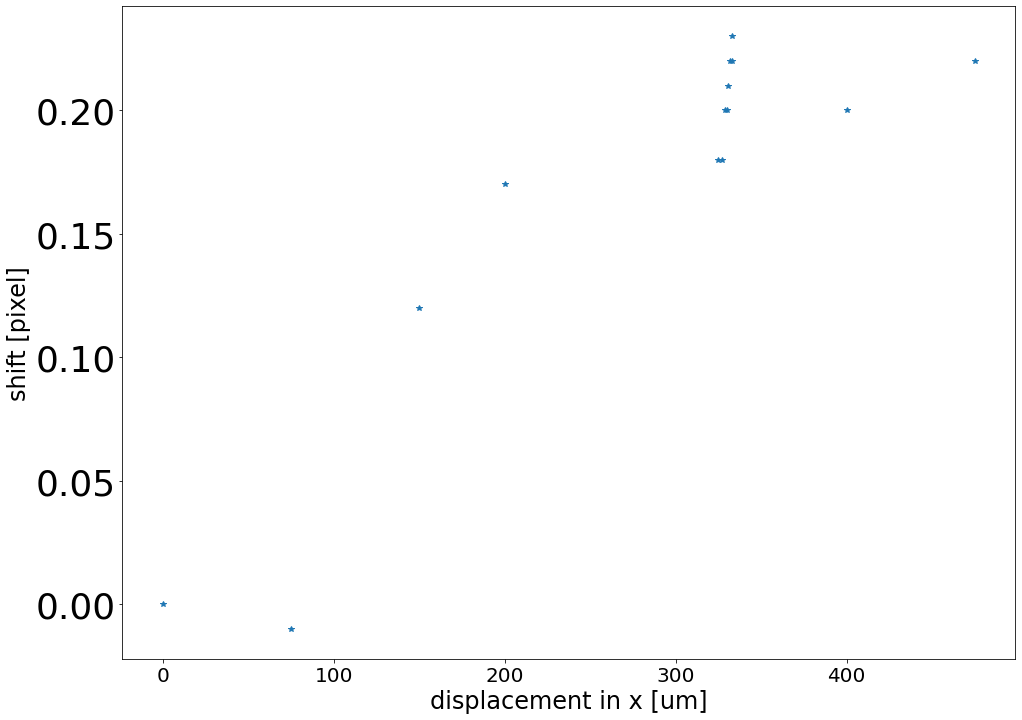

In [459]:
true_x_displacements = [0,75,150,200,325,327,329,330,332,333,400,475,330.5,333.05]

y_up = 0
y_low = 480
x_up=640
x_low=0
attr_x_side2_img = attr_sc_x_images[2]
attr_x_side2_displacement = two_d_shift_analysis(attr_x_side2_img[0][y_up:y_low][x_low:x_up],images=attr_x_side2_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(true_x_displacements,attr_x_side2_displacement[0],marker="*",linestyle="")

plt.ylabel("shift [pixel]")
plt.xlabel("displacement in x [um]")
plt.show()

[0. 0.]
[-2.588 -0.092]
[-4.584 -0.324]
[-4.649 -0.359]
[-4.473 -0.323]
[-4.51 -0.36]
[-4.522 -0.368]
[-4.505 -0.388]
[-4.519 -0.358]
[-4.486 -0.3  ]
[-4.311 -0.316]
[-4.497  0.01 ]
[-4.495 -0.321]
[-4.518 -0.312]


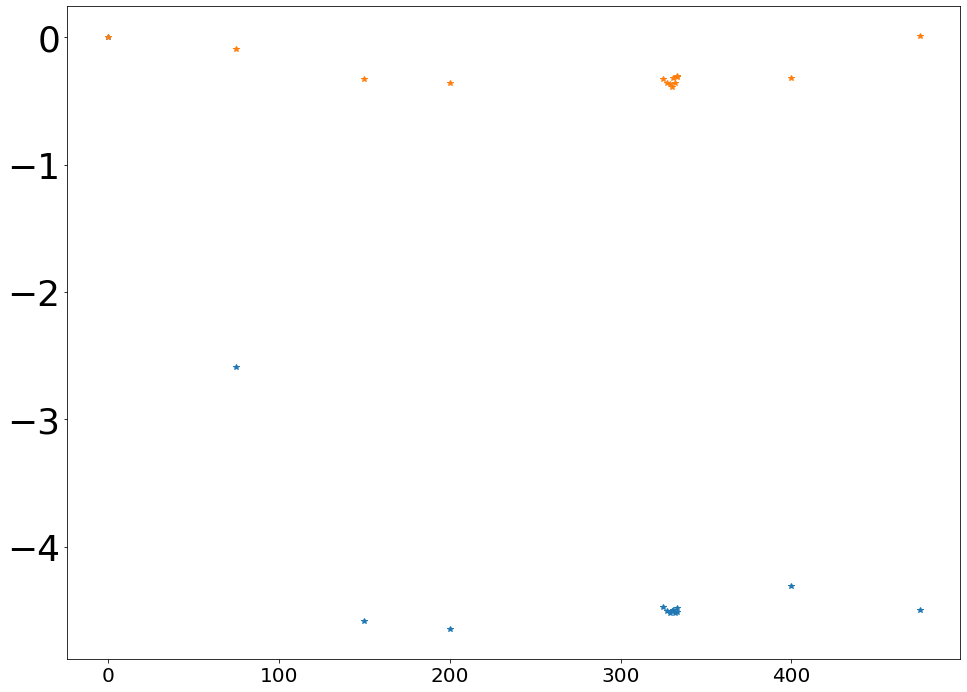

In [465]:
y_up = 0
y_low = 480
x_up=640
x_low=0
attr_x_top_img = attr_sc_x_images[1]
attr_x_top_displacement = two_d_shift_analysis(attr_x_top_img[0][y_up:y_low,x_low:x_up],images=attr_x_top_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=1000,print_results=True)

true_x_displacements = [0,75,150,200,325,327,329,330,332,333,400,475,330.5,333.05]
plt.plot(true_x_displacements,attr_x_top_displacement[0],marker="*",linestyle="")
plt.plot(true_x_displacements,attr_x_top_displacement[1],marker="*",linestyle="")

[4.5  0.39]
[2.58 0.36]
[2.47 0.4 ]
[2.41 0.31]
[0.2  0.01]
[0.13 0.01]
[0.05 0.01]
[0. 0.]
[-0.1  0. ]
[-0.14 -0.01]
[-2.47 -0.17]
[-4.46 -0.38]
[-0.03  0.  ]
[-0.15 -0.01]


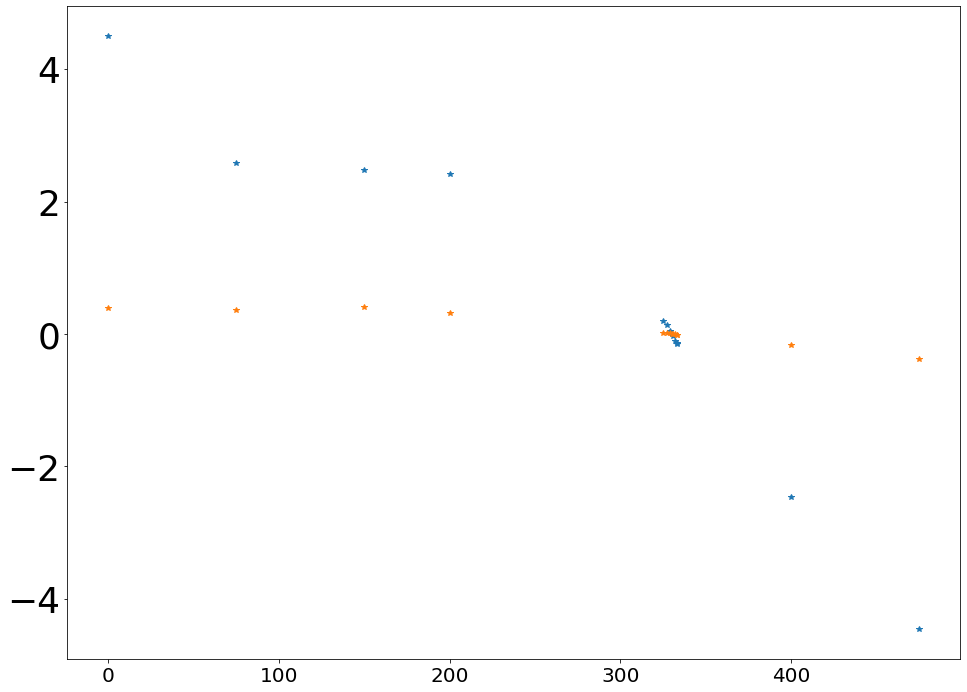

In [466]:
y_up = 0
y_low = 480
x_up=640
x_low=0
attr_x_top_zoom_img = attr_sc_x_images[1]
attr_x_top_zoom_displacement = two_d_shift_analysis(attr_x_top_zoom_img[7][y_up:y_low,x_low:x_up],images=attr_x_top_zoom_img,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)
true_x_displacements = [0,75,150,200,325,327,329,330,332,333,400,475,330.5,333.05]

plt.plot(true_x_displacements,attr_x_top_zoom_displacement[0],marker="*",linestyle="")
plt.plot(true_x_displacements,attr_x_top_zoom_displacement[1],marker="*",linestyle="")

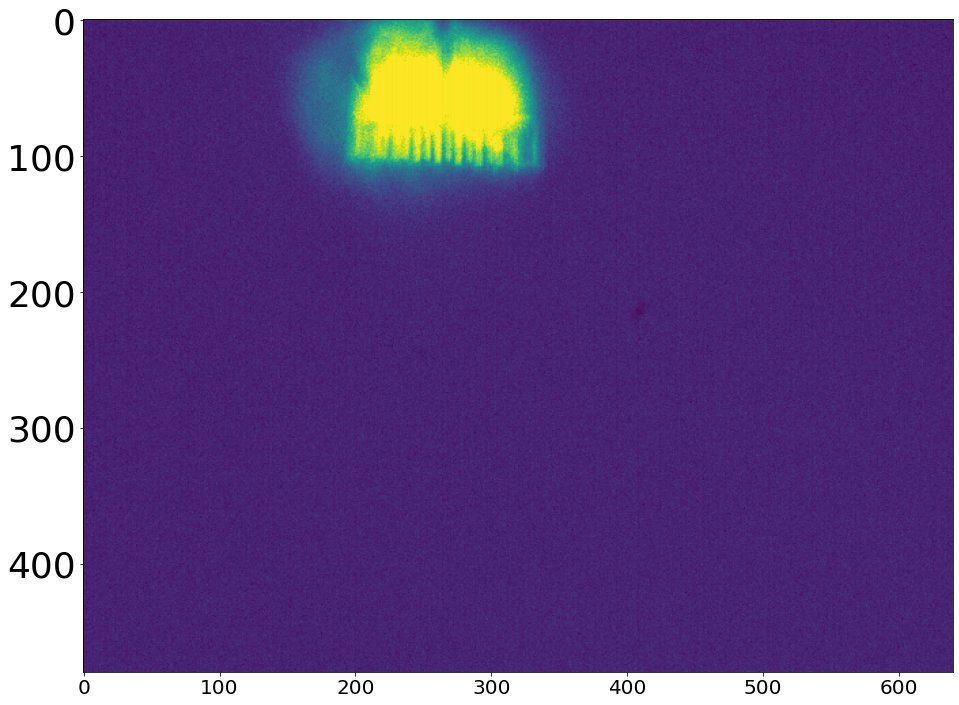

In [477]:
plt.imshow(attr_sc_x_images[1][0])

In [34]:
### kinesis reprodicibility

# load the data for the shift analysis
attr_sc_kinesis_images = []
for i in np.arange(1,7,1):
    #print("/data/SC_data/ImageAnalysis/Tilt_Analysis_20200905/X/x%s/frame_0_*.npy" %str(i))
    t = load_npy_files("/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/%s/frame_0_*.npy" %str(i))
    #print(np.shape(t))
    attr_sc_kinesis_images.append(t)
#print(np.shape(attr_sc_x_images))
attr_sc_kinesis_images = np.swapaxes(attr_sc_kinesis_images,0,1)     
attr_ni_kinesis_images= load_img_files("/data/new_trap/ImageAnalysis/20200907/kinesis/*")




/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/1/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/1/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/1/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/2/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/2/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/2/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/3/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/3/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/3/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/4/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/4/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/4/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Kinesis/5/frame_0_0.npy 0

[0. 0.]
[-0.04 -0.01]
[0. 0.]
[0.02 0.  ]
[0.03 0.  ]


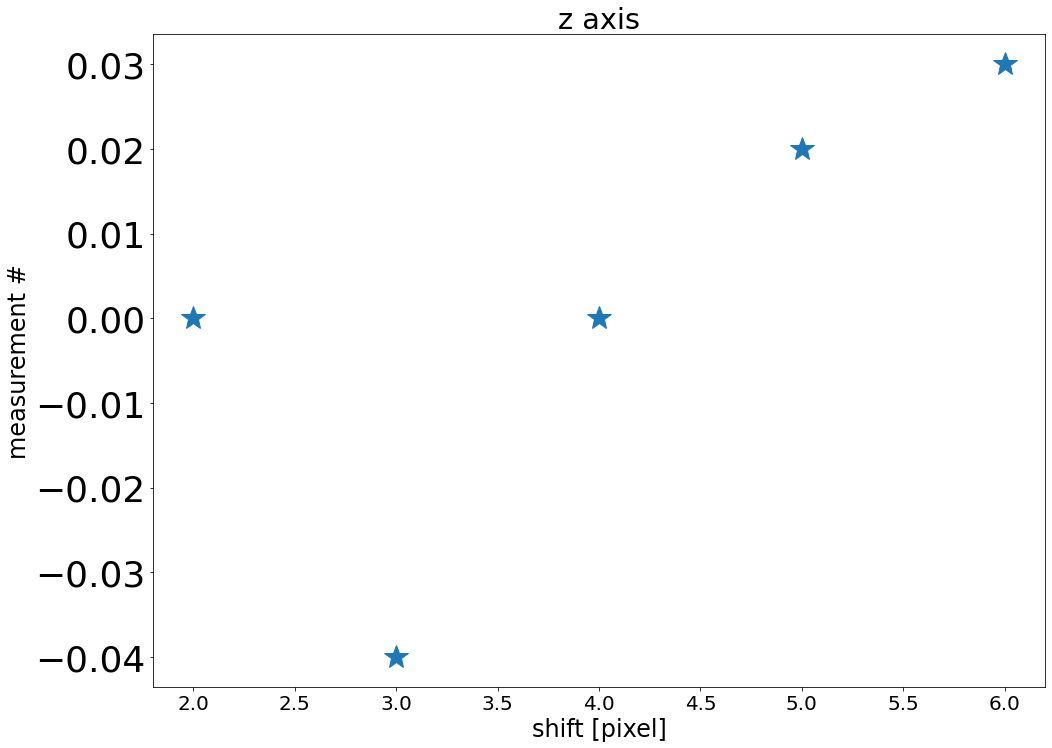

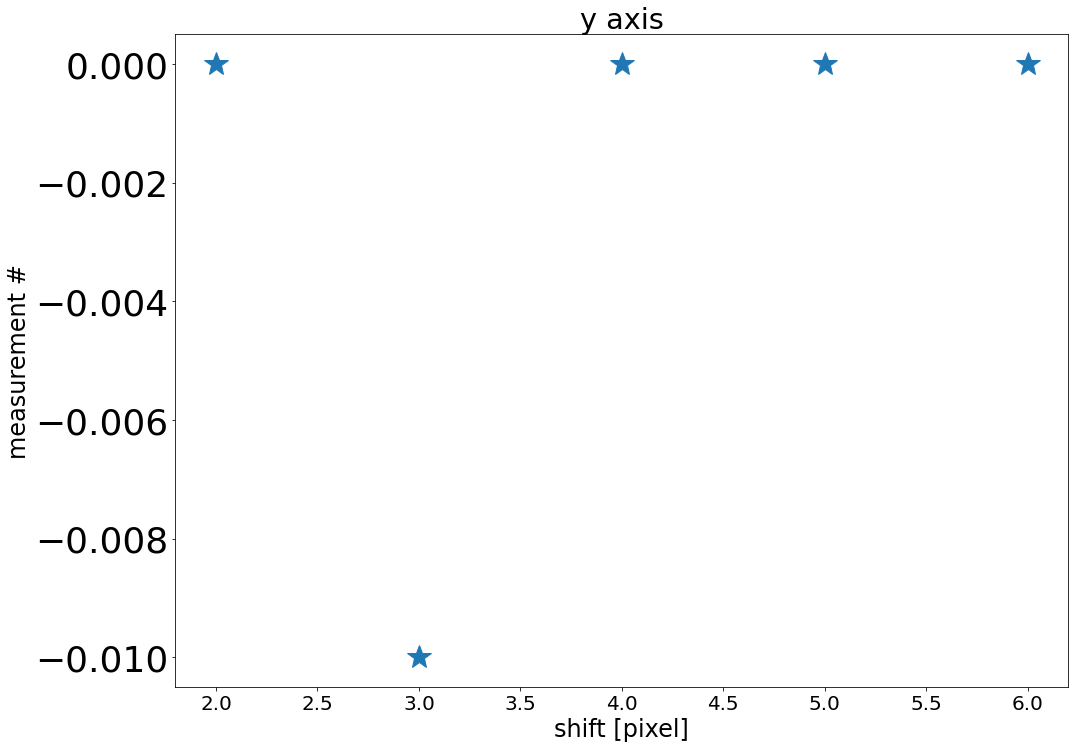

In [359]:
xaxis = [2,3,4,5,6]

y_low=1024
y_up=0
x_low = 0
x_up = 1280
image_list = attr_ni_kinesis_images
attr_kinesis_ni_displacement = two_d_shift_analysis(image_list[0][y_up:y_low,x_low:x_up],images=image_list,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.title("z axis")
plt.plot(xaxis,attr_kinesis_ni_displacement[0], linestyle="",marker="*",markersize="25")
plt.xlabel("shift [pixel]")
plt.ylabel("measurement #")
plt.show()
plt.title("y axis")
plt.xlabel("shift [pixel]")
plt.ylabel("measurement #")
plt.plot(xaxis,attr_kinesis_ni_displacement[1], linestyle="",marker="*",markersize="25")


[0. 0.]
[ 0.01 -0.04]
[ 0.02 -0.04]
[ 0.03 -0.05]
[0.02 0.  ]
[ 0.03 -0.02]


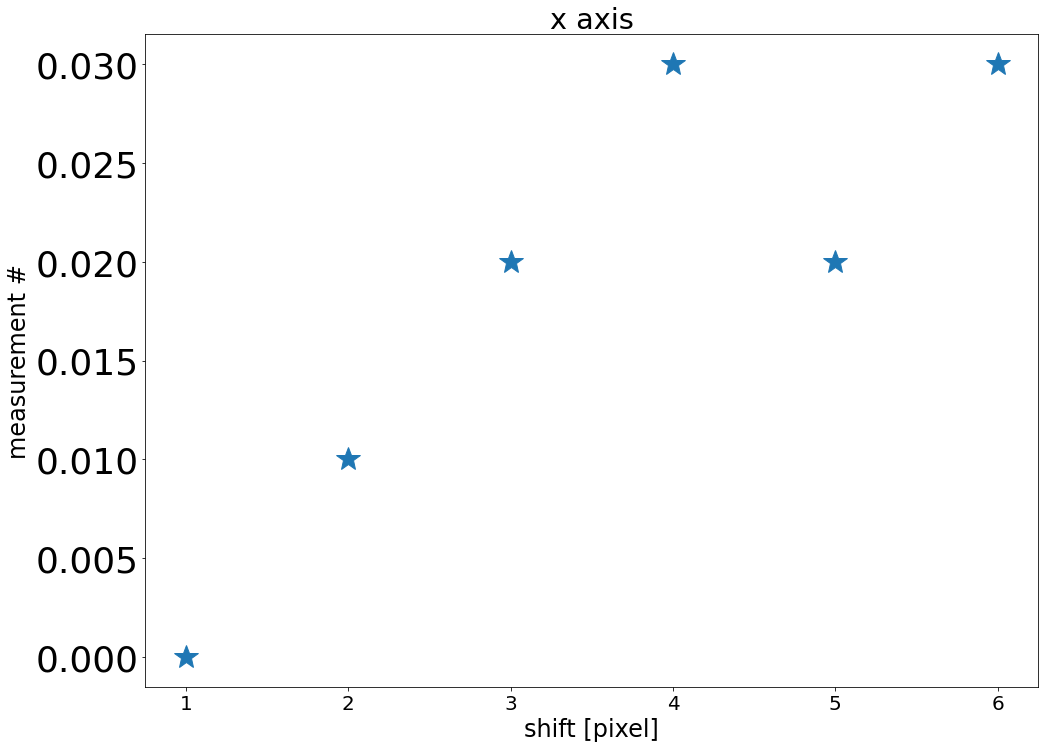

Text(0, 0.5, 'measurement #')

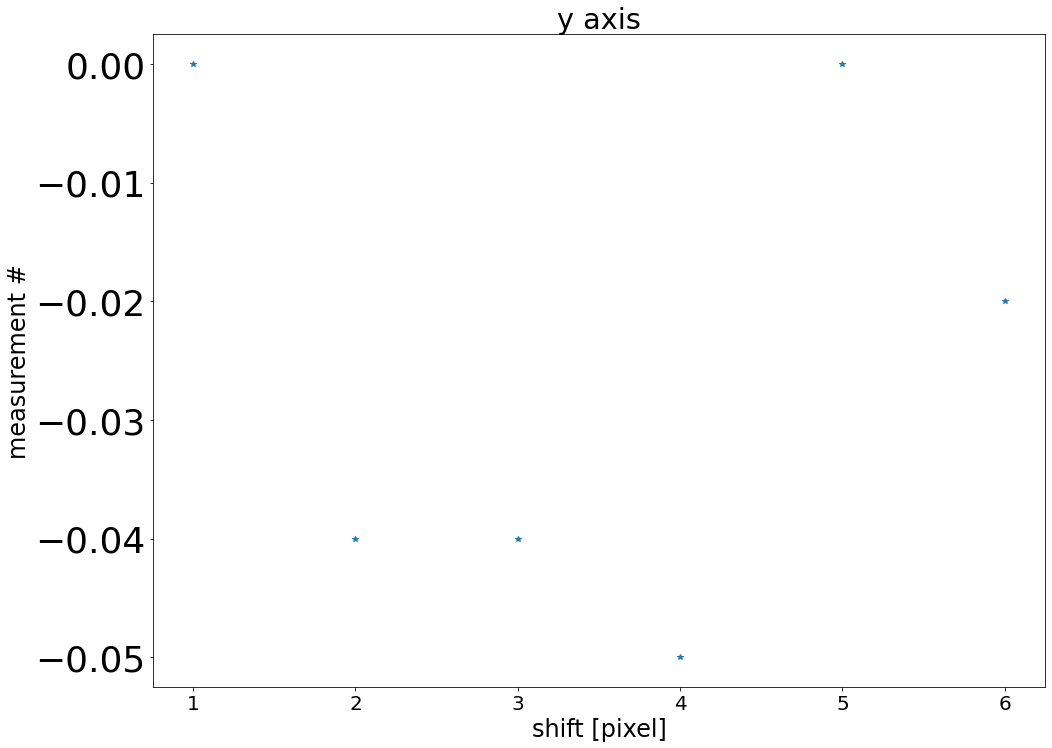

In [369]:
xaxis = [1,2,3,4,5,6]

y_low=480
y_up=0
x_low = 0
x_up = 640
image_list = attr_sc_kinesis_images[0]
attr_kinesis_top_zoom_displacement = two_d_shift_analysis(image_list[0][y_up:y_low,x_low:x_up],images=image_list,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.title("x axis")
plt.plot(xaxis,attr_kinesis_top_zoom_displacement[0], linestyle="",marker="*",markersize="25")
plt.xlabel("shift [pixel]")
plt.ylabel("measurement #")
plt.show()
plt.plot(xaxis,attr_kinesis_top_zoom_displacement[1], linestyle="",marker="*")
plt.title("y axis")
plt.xlabel("shift [pixel]")
plt.ylabel("measurement #")

[0. 0.]
[-0.02  0.02]
[-0.03  0.02]
[-0.03  0.02]
[-0.03  0.  ]
[-0.03  0.  ]


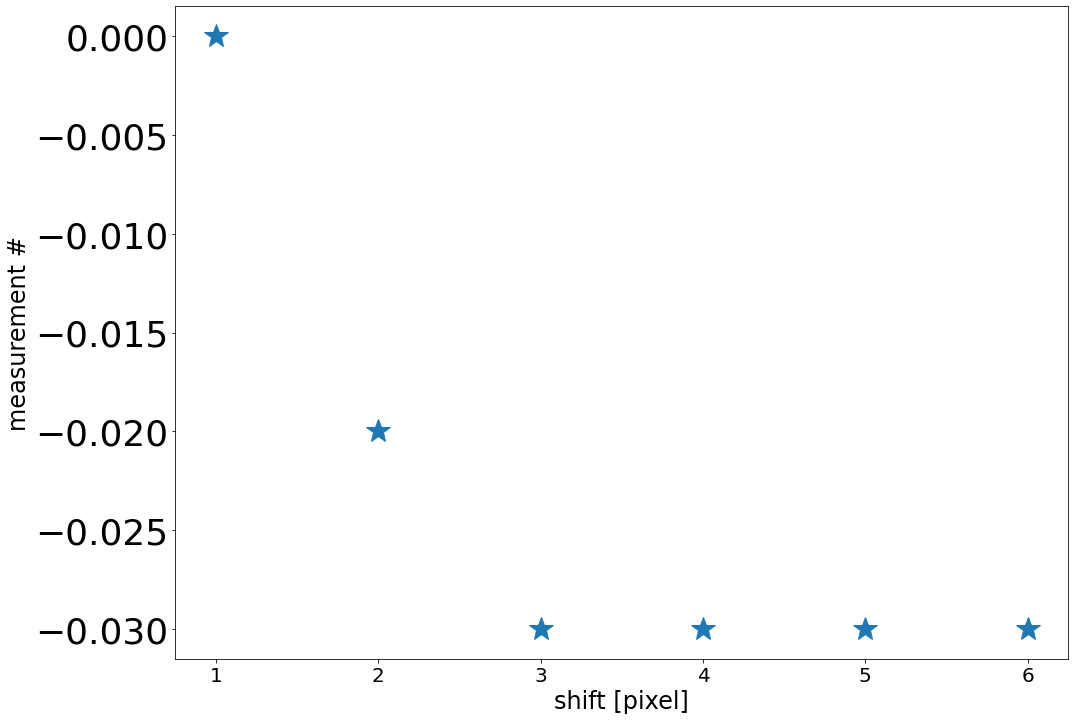

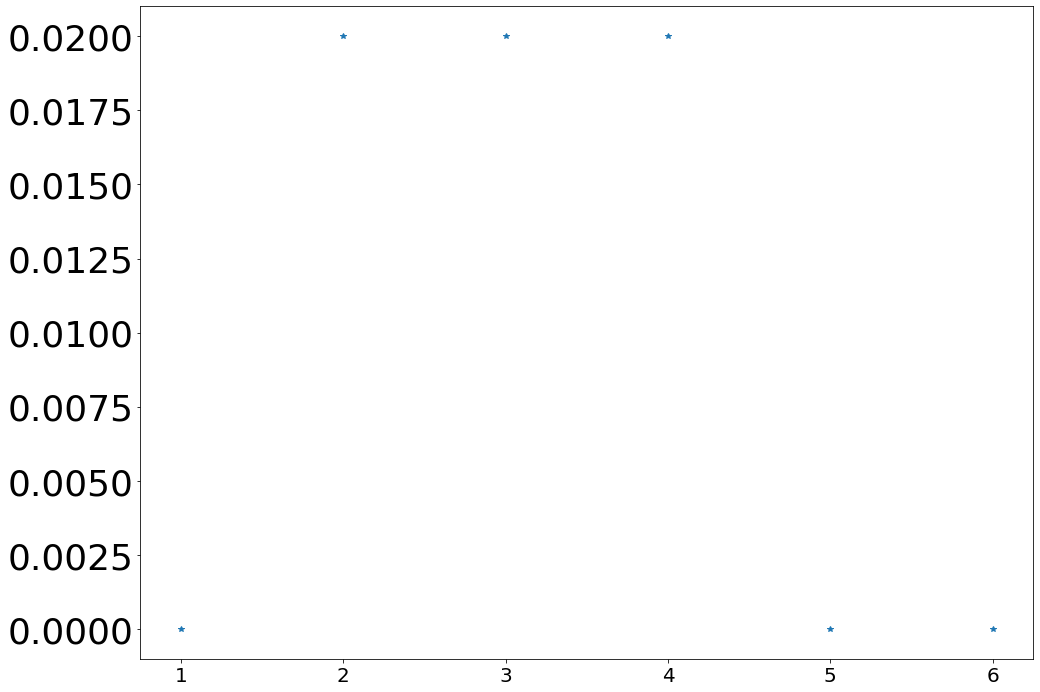

In [355]:
xaxis = [1,2,3,4,5,6]

y_low=480
y_up=0
x_low = 0
x_up = 640
image_list = attr_sc_kinesis_images[1]
attr_kinesis_top_displacement = two_d_shift_analysis(image_list[0][y_up:y_low,x_low:x_up],images=image_list,y_low=y_low,y_up=y_up,x_low=x_low,x_up=x_up,upsample_factor=100,print_results=True)

plt.plot(xaxis,attr_kinesis_top_displacement[0], linestyle="",marker="*",markersize="25")
plt.xlabel("shift [pixel]")
plt.ylabel("measurement #")
plt.show()
plt.plot(xaxis,attr_kinesis_top_displacement[1], linestyle="",marker="*")

In [137]:
# load the data for the shift analysis
shield_sc_z_images = []
for i in np.arange(0,6,1):
    shield_sc_z_images.append(load_npy_files("/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/%dV/frame_0_*.npy" %i))
shield_sc_z_images = np.swapaxes(shield_sc_z_images,0,1) 
shield_ni_z_images = load_img_files("/data/new_trap/ImageAnalysis/20200907/z/*")

/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/0V/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/0V/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/0V/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/1V/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/1V/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/1V/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/2V/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/2V/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/2V/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/3V/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/3V/frame_0_1.npy 1
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/3V/frame_0_2.npy 2
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/4V/frame_0_0.npy 0
/data/SC_data/ImageAnalysis/Tilt_Analysis_20200907/Z/4V/frame_0_

In [264]:
# z and y: get gaus profile from side1 on either edge and compare

attractor_image_side = attr_ni_y_images[7]
shield_image_side = shield_ni_z_images[7]
attractor_image_top = attr_sc_x_images[0][10]
shield_image_top = shield_sc_z_images[0][4]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


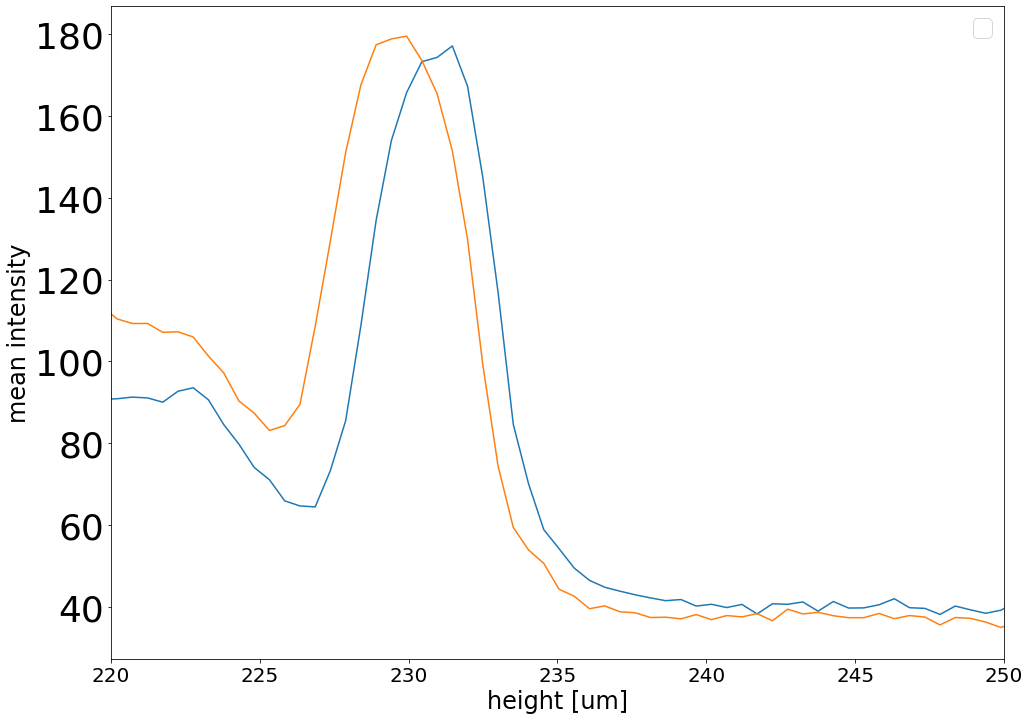

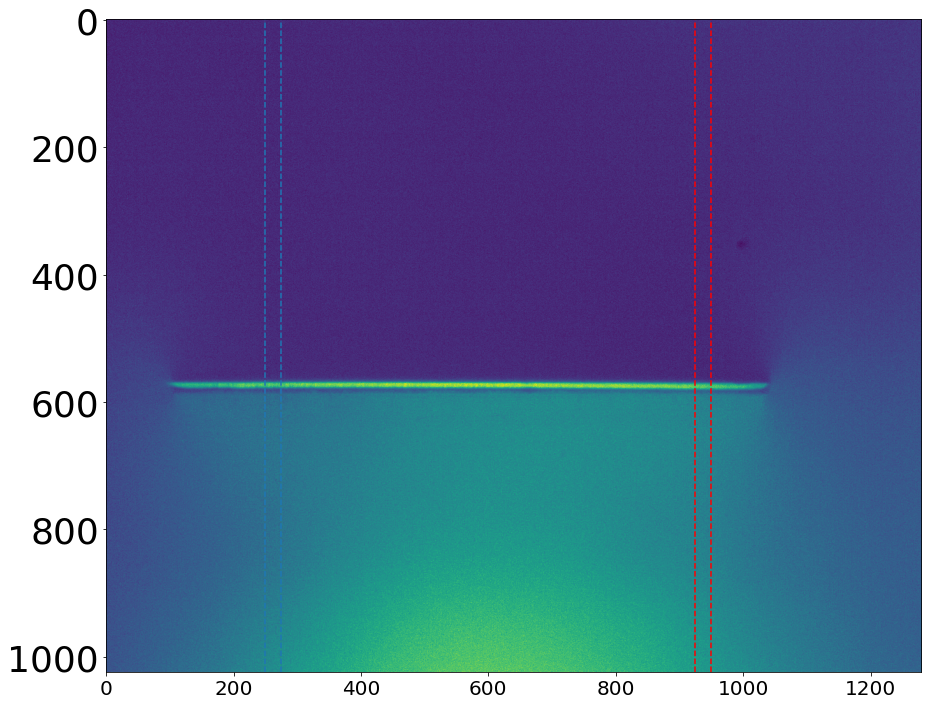

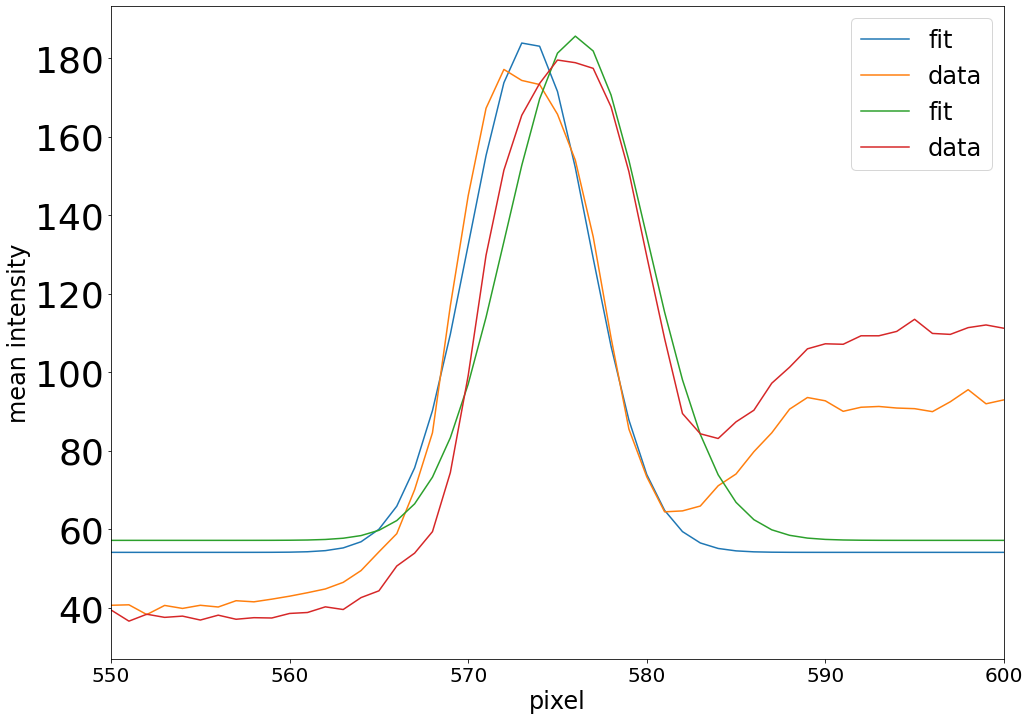

In [268]:
for i in [85]:
    img = attractor_image_side#threshold_image(attractor_image_side,i,255)
    low_left = 250
    up_left = 275
    low_right = 925
    up_right = 950
    get_height_projection(img,low_lim=low_left,up_lim=up_left,pixel_size=cal_factor_z_side1_pixel_size)
    get_height_projection(img,low_lim=low_right,up_lim=up_right,pixel_size=cal_factor_z_side1_pixel_size)
    plt.xlim(220,250)
    plt.show()
    plt.imshow(img)
    plt.axvline(low_left,linestyle="dashed")
    plt.axvline(up_left,linestyle="dashed")
    plt.axvline(low_right,linestyle="dashed", color="Red")
    plt.axvline(up_right,linestyle="dashed",color="red")
    plt.show()
    g1 = get_height_fit(img,low_left,up_left,400,600,15)
    g2 = get_height_fit(img,low_right,up_right,400,600,15)
    plt.xlim(550,600)
    plt.show()

In [253]:
height_low = 1024*cal_factor_z_side1_pixel_size-g1[0]*cal_factor_z_side1_pixel_size
height_up = 1024*cal_factor_z_side1_pixel_size-g2[0]*cal_factor_z_side1_pixel_size
tilt_attr = height_up-height_low
print(tilt_attr)
distance_attr = cal_factor_z_side1_pixel_size*((up_right+low_right)/2-(up_left+low_left)/2)
print(distance_attr)


-1.404182857418732
345.66487366521227


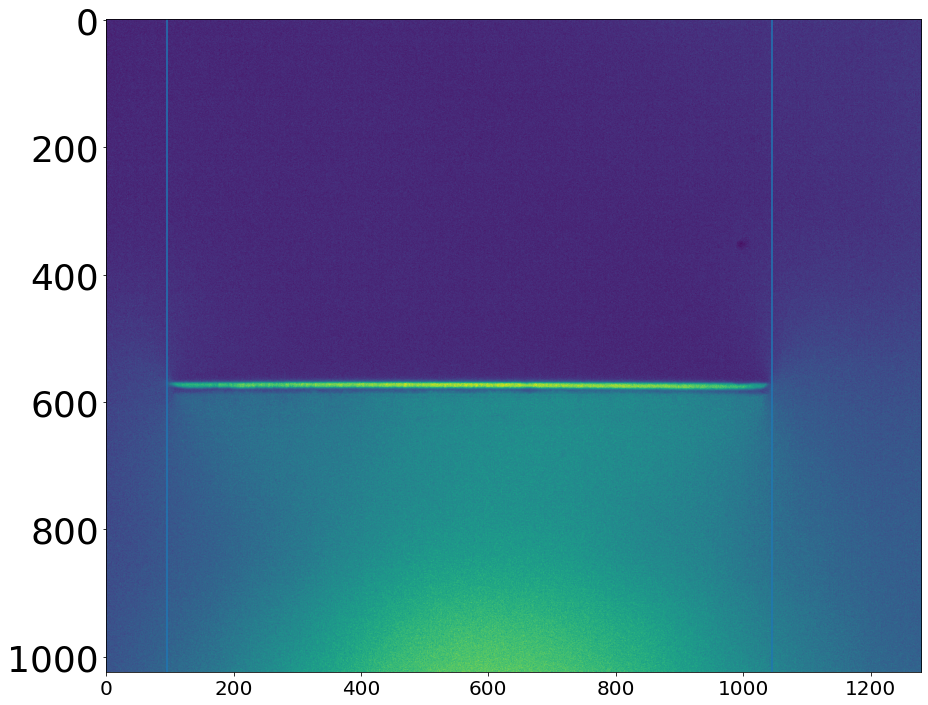

In [290]:
#s = np.swapaxes(attractor_image_side,0,1)
plt.imshow(attractor_image_side)
plt.axvline(95)
plt.axvline(1045)
#get_height_projection(s,0,1150,img_height=1280)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


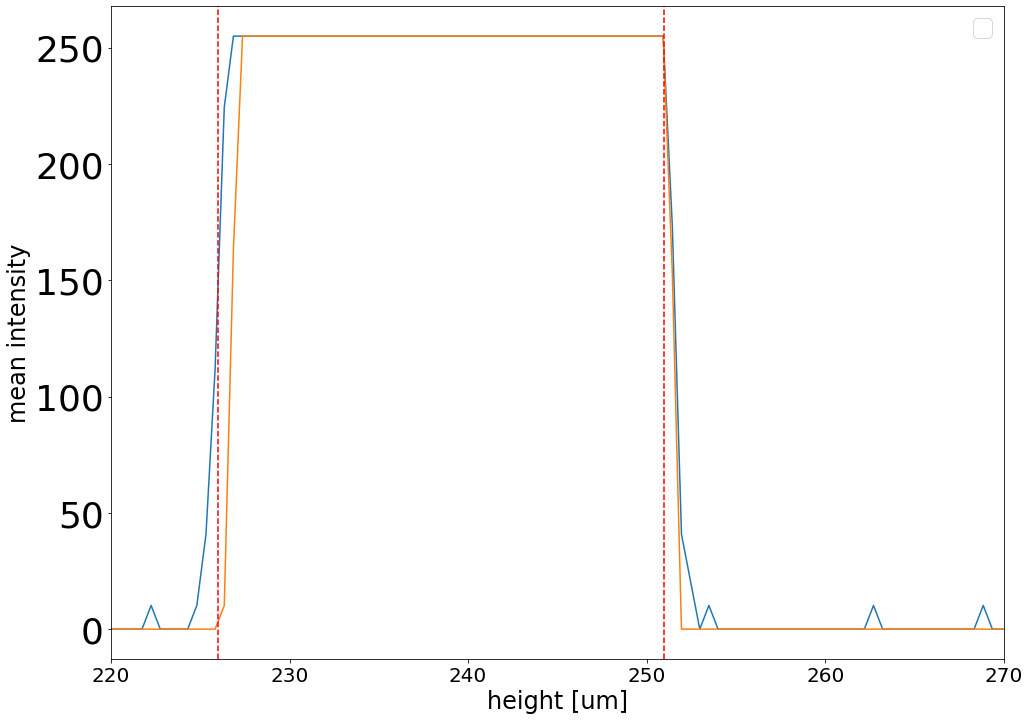

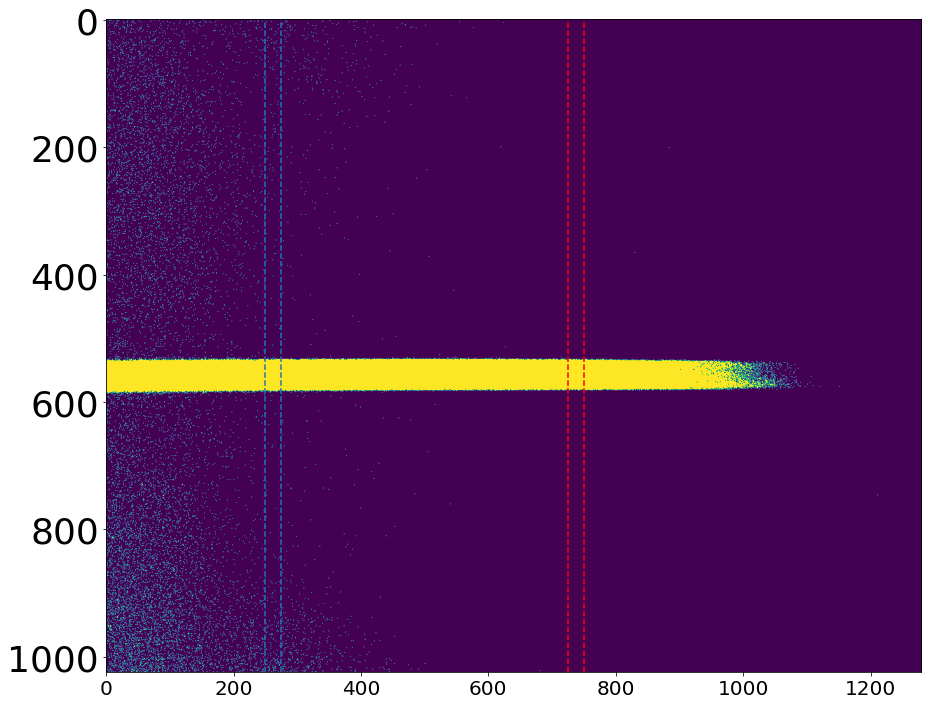

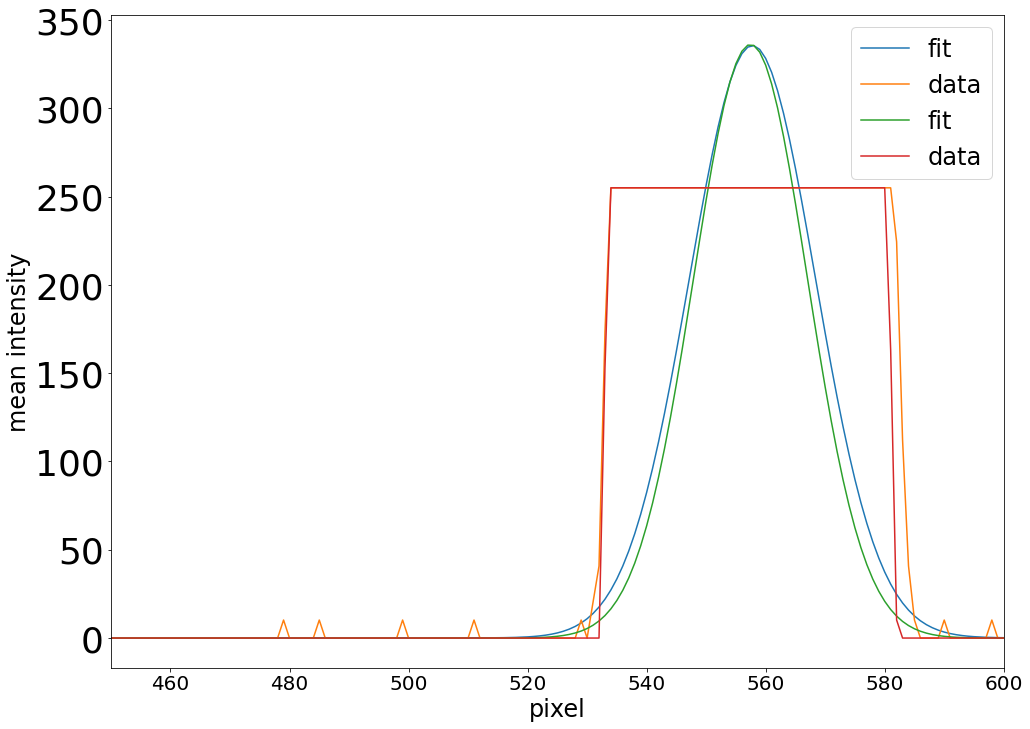

0.16382041141423542
243.2456518384827


In [346]:
for i in [125]:#,105,115,125,135]:
    input_img=shield_image_side
    img = threshold_image(input_img,i,255)
    low_left = 250
    up_left = 275
    low_right = 725
    up_right = 750
    get_height_projection(img,low_lim=low_left,up_lim=up_left,pixel_size=cal_factor_z_side1_pixel_size)
    get_height_projection(img,low_lim=low_right,up_lim=up_right,pixel_size=cal_factor_z_side1_pixel_size)
    plt.xlim(220,270)
    plt.axvline(226,linestyle="dashed", color="red")
    plt.axvline(251,linestyle="dashed",color="red")
    plt.show()
    plt.imshow(img)
    plt.axvline(low_left,linestyle="dashed")
    plt.axvline(up_left,linestyle="dashed")
    plt.axvline(low_right,linestyle="dashed", color="Red")
    plt.axvline(up_right,linestyle="dashed",color="red")
    plt.show()
    g1 = get_height_fit(img,low_left,up_left,400,600,15)
    g2 = get_height_fit(img,low_right,up_right,400,600,15)
    plt.xlim(450,600)
    plt.show()
    
    height_low = 1024*cal_factor_z_side1_pixel_size-g1[0]*cal_factor_z_side1_pixel_size
    height_up = 1024*cal_factor_z_side1_pixel_size-g2[0]*cal_factor_z_side1_pixel_size
    tilt_shield = height_up-height_low
    print(tilt_shield)
    distance_shield = cal_factor_z_side1_pixel_size*((up_right+low_right)/2-(up_left+low_left)/2)
    print(distance_shield)


In [347]:
shield_top_t = threshold_image(attractor_image_top,90,255)


In [349]:
attr_top_t = threshold_image(attractor_image_top,90,255)


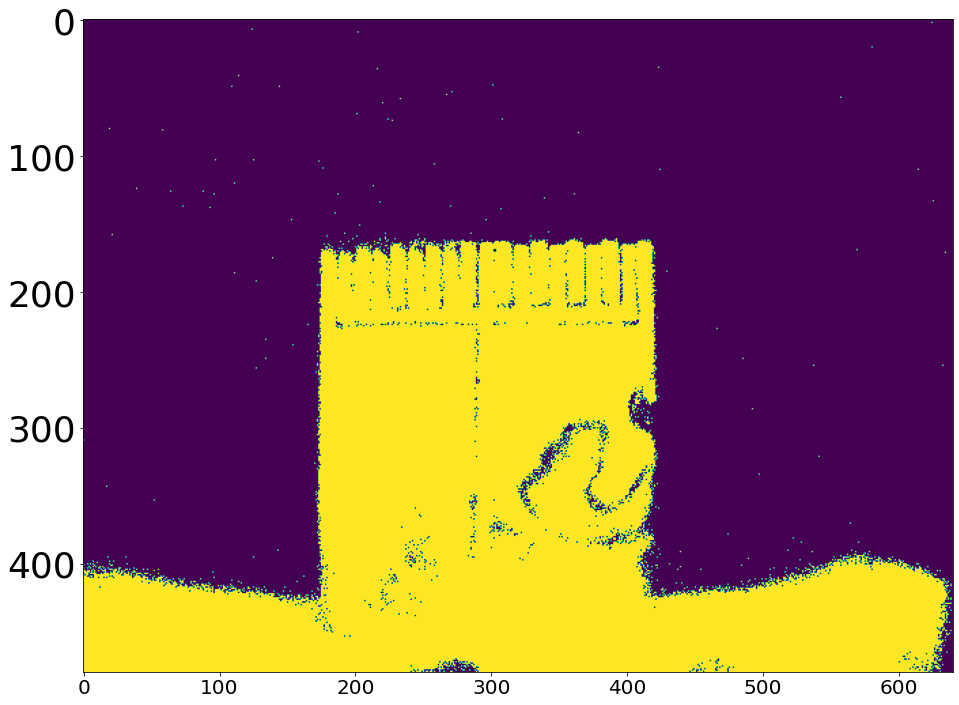

In [351]:
plt.imshow(attr_top_t)

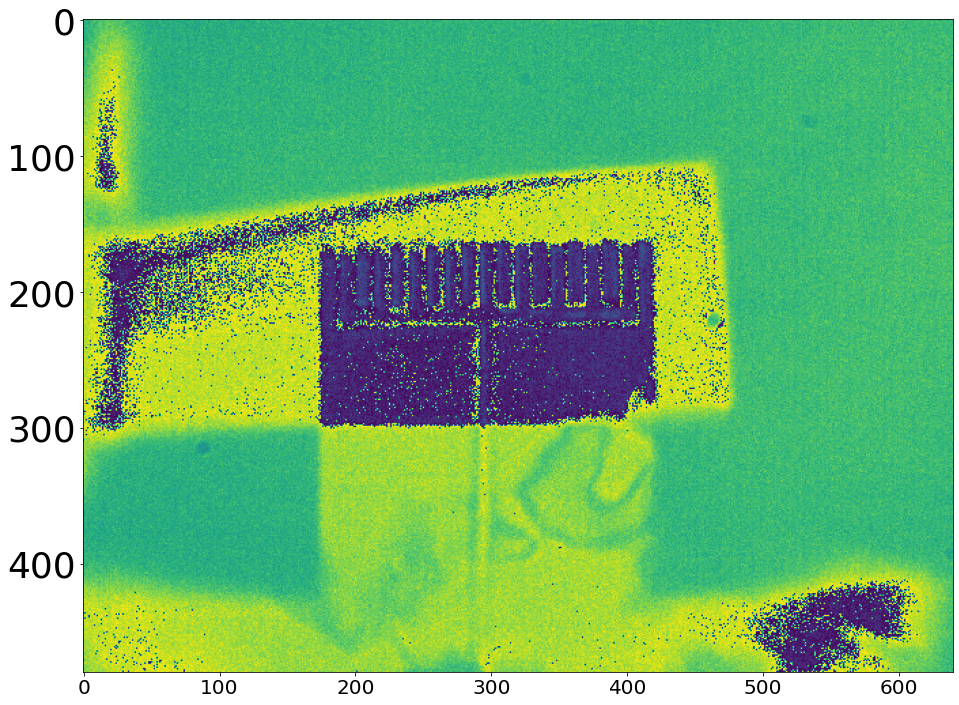

In [348]:
plt.imshow(shield_image_top+attractor_image_top)
